# Introducción

En el siguiente análisis buscamos filtrar los datos provistos por la cátedra para quedarnos con los que más utiles nos parezcan a la hora de tener que predecir un precio de una nueva propiedad. Incluye selección de los datos más importantes, limpieza de datos basura y visualizaciones para buscar relaciones entre las diferentes características de una propiedad.

IMPORTANTE: para que funcione hay que ubicar los siguientes csv en la misma carpeta que este notebook:
* properati-AR-2013-08-01-properties-sell.csv
* properati-AR-2014-02-01-properties-sell.csv
* properati-AR-2014-09-01-properties-sell.csv
* properati-AR-2015-01-01-properties-sell.csv
* properati-AR-2015-07-01-properties-sell-six_months.csv
* properati-AR-2015-12-01-properties-sell-six_months.csv
* properati-AR-2016-06-01-properties-sell.csv
* properati-AR-2017-01-01-properties-sell.csv
* properati-AR-2017-08-01-properties-sell-six_months.csv


## Lectura y agrupamiento de los datos

Primero importamos las librerias necesarias para poder realizar la exploración de datos, para eso importamos pandas, numpy, matplotlib y demas librerías, también lo configuramos para que los gráficos se vean bien en pantalla.

In [1]:
# magic function para hacer que los gráficos de matplotlib se renderizen en el notebook.
% matplotlib notebook

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 10)

#### Preparación de los dataframes

Al tener diferentes archivos desde los cuales extraemos datos, los cuales en conjunto abarcan un período de 4 años de publicaciones, debemos unificarlos en un solo dataframe, teniendo cuidado de que no se repitan datos. A su vez, nos quedamos solamente con los registros de CABA y G.B.A.

In [2]:
df1 = pd.read_csv('properati-AR-2013-08-01-properties-sell.csv', low_memory=False)
fecha = df1['created_on'] < '2013-08-01'
caba = df1.place_with_parent_names.str.contains('Capital')
gba = df1.place_with_parent_names.str.contains('G.B.A')
    
df1 = df1.loc[fecha & (caba | gba),:]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34081 entries, 1 to 47933
Data columns (total 20 columns):
created_on                    34081 non-null object
operation                     34081 non-null object
property_type                 34081 non-null object
place_name                    34081 non-null object
place_with_parent_names       34081 non-null object
geonames_id                   27601 non-null float64
lat-lon                       31358 non-null object
lat                           31358 non-null float64
lon                           31358 non-null float64
price                         28684 non-null float64
currency                      28684 non-null object
price_aprox_local_currency    28684 non-null float64
price_aprox_usd               28684 non-null float64
surface_in_m2                 28995 non-null float64
price_usd_per_m2              25075 non-null float64
floor                         7849 non-null float64
rooms                         27528 non-null float6

In [3]:
df2 = pd.read_csv('properati-AR-2014-02-01-properties-sell.csv', low_memory=False)
fecha = (df2['created_on']>= '2013-08-01') & (df2['created_on']<= '2014-01-31')
caba = df2.place_with_parent_names.str.contains('Capital')
gba = df2.place_with_parent_names.str.contains('G.B.A')

df2 = df2.loc[fecha & (caba | gba),:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35501 entries, 22168 to 70077
Data columns (total 20 columns):
created_on                    35501 non-null object
operation                     35501 non-null object
property_type                 35501 non-null object
place_name                    35501 non-null object
place_with_parent_names       35501 non-null object
geonames_id                   30338 non-null float64
lat-lon                       34312 non-null object
lat                           34312 non-null float64
lon                           34309 non-null float64
price                         30790 non-null float64
currency                      30790 non-null object
price_aprox_local_currency    30790 non-null float64
price_aprox_usd               30790 non-null float64
surface_in_m2                 30518 non-null float64
price_usd_per_m2              27127 non-null float64
floor                         4771 non-null float64
rooms                         27312 non-null fl

In [4]:
df3 = pd.read_csv('properati-AR-2014-09-01-properties-sell.csv', low_memory=False)
fecha = (df3['created_on']>= '2014-02-01') & (df3['created_on']<= '2014-08-31')
caba = df3.place_with_parent_names.str.contains('Capital')
gba = df3.place_with_parent_names.str.contains('G.B.A')

df3 = df3.loc[fecha & (caba | gba),:]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32179 entries, 13544 to 61345
Data columns (total 20 columns):
created_on                    32179 non-null object
operation                     32179 non-null object
property_type                 32179 non-null object
place_name                    32179 non-null object
place_with_parent_names       32179 non-null object
geonames_id                   26652 non-null float64
lat-lon                       25621 non-null object
lat                           25621 non-null float64
lon                           25621 non-null float64
price                         27486 non-null float64
currency                      27486 non-null object
price_aprox_local_currency    27486 non-null float64
price_aprox_usd               27486 non-null float64
surface_in_m2                 16526 non-null float64
price_usd_per_m2              13727 non-null float64
floor                         7081 non-null float64
rooms                         16705 non-null fl

In [5]:
df4 = pd.read_csv('properati-AR-2015-01-01-properties-sell.csv', low_memory=False)
fecha = (df4['created_on']>= '2014-09-01') & (df4['created_on']<= '2014-12-31')
caba = df4.place_with_parent_names.str.contains('Capital')
gba = df4.place_with_parent_names.str.contains('G.B.A')

df4 = df4.loc[fecha & (caba | gba),:]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18333 entries, 40033 to 67180
Data columns (total 20 columns):
created_on                    18333 non-null object
operation                     18333 non-null object
property_type                 18333 non-null object
place_name                    18333 non-null object
place_with_parent_names       18333 non-null object
geonames_id                   15121 non-null float64
lat-lon                       13681 non-null object
lat                           13681 non-null float64
lon                           13681 non-null float64
price                         15608 non-null float64
currency                      15608 non-null object
price_aprox_local_currency    15608 non-null float64
price_aprox_usd               15608 non-null float64
surface_in_m2                 8863 non-null float64
price_usd_per_m2              6939 non-null float64
floor                         5133 non-null float64
rooms                         11879 non-null floa

In [6]:
df5 = pd.read_csv('properati-AR-2015-07-01-properties-sell-six_months.csv', low_memory=False)

fecha = (df5['created_on']>= '2015-01-01') & (df5['created_on']<= '2015-07-31')
caba = df5.place_with_parent_names.str.contains('Capital')
gba = df5.place_with_parent_names.str.contains('G.B.A')

df5 = df5.loc[fecha & (caba | gba),:]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35521 entries, 0 to 44185
Data columns (total 27 columns):
id                            35521 non-null object
created_on                    35521 non-null object
operation                     35521 non-null object
property_type                 35521 non-null object
place_name                    35518 non-null object
place_with_parent_names       35521 non-null object
country_name                  35521 non-null object
state_name                    35521 non-null object
geonames_id                   27773 non-null float64
lat-lon                       21182 non-null object
lat                           21182 non-null float64
lon                           21182 non-null float64
price                         34303 non-null float64
currency                      32568 non-null object
price_aprox_local_currency    34303 non-null float64
price_aprox_usd               34303 non-null float64
surface_total_in_m2           25988 non-null float64


In [7]:
df6 = pd.read_csv('properati-AR-2015-12-01-properties-sell-six_months.csv', low_memory=False)
fecha = (df6['created_on']>= '2015-08-01') & (df6['created_on']<= '2015-11-30')
caba = df6.place_with_parent_names.str.contains('Capital')
gba = df6.place_with_parent_names.str.contains('G.B.A')

df6 = df6.loc[fecha & (caba | gba),:]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12718 entries, 3485 to 33573
Data columns (total 27 columns):
id                            12718 non-null object
created_on                    12718 non-null object
operation                     12718 non-null object
property_type                 12718 non-null object
place_name                    12716 non-null object
place_with_parent_names       12718 non-null object
country_name                  12718 non-null object
state_name                    12718 non-null object
geonames_id                   10426 non-null float64
lat-lon                       9613 non-null object
lat                           9613 non-null float64
lon                           9613 non-null float64
price                         12300 non-null float64
currency                      11512 non-null object
price_aprox_local_currency    12300 non-null float64
price_aprox_usd               12300 non-null float64
surface_total_in_m2           9439 non-null float64
s

In [8]:
df7 = pd.read_csv('properati-AR-2016-06-01-properties-sell.csv', low_memory=False)
fecha = (df7['created_on']>= '2015-12-01') & (df7['created_on']<= '2016-06-30')
caba = df7.place_with_parent_names.str.contains('Capital')
gba = df7.place_with_parent_names.str.contains('G.B.A')

df7 = df7.loc[fecha & (caba | gba),:]
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27266 entries, 1 to 39665
Data columns (total 27 columns):
id                            27266 non-null object
created_on                    27266 non-null object
operation                     27266 non-null object
property_type                 27266 non-null object
place_name                    27261 non-null object
place_with_parent_names       27266 non-null object
country_name                  27266 non-null object
state_name                    27266 non-null object
geonames_id                   21753 non-null float64
lat-lon                       19948 non-null object
lat                           19948 non-null float64
lon                           19948 non-null float64
price                         25484 non-null float64
currency                      24254 non-null object
price_aprox_local_currency    25484 non-null float64
price_aprox_usd               25484 non-null float64
surface_total_in_m2           18495 non-null float64


In [9]:
df8 = pd.read_csv('properati-AR-2017-01-01-properties-sell.csv', low_memory=False)
fecha = (df8['created_on']>= '2016-07-01') & (df8['created_on']<= '2017-01-31')
caba = df8.place_with_parent_names.str.contains('Capital')
gba = df8.place_with_parent_names.str.contains('G.B.A')

df8 = df8.loc[fecha & (caba | gba),:]
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41139 entries, 1 to 59805
Data columns (total 27 columns):
id                            41139 non-null object
created_on                    41139 non-null object
operation                     41139 non-null object
property_type                 41139 non-null object
place_name                    41131 non-null object
place_with_parent_names       41139 non-null object
country_name                  41139 non-null object
state_name                    41139 non-null object
geonames_id                   32320 non-null float64
lat-lon                       32603 non-null object
lat                           32603 non-null float64
lon                           32603 non-null float64
price                         38095 non-null float64
currency                      37392 non-null object
price_aprox_local_currency    38095 non-null float64
price_aprox_usd               38095 non-null float64
surface_total_in_m2           31801 non-null float64


In [10]:
df9 = pd.read_csv('properati-AR-2017-08-01-properties-sell-six_months.csv', low_memory=False)
fecha = (df9['created_on']>= '2017-02-01') & (df9['created_on']<= '2017-07-31')
caba = df9.place_with_parent_names.str.contains('Capital')
gba = df9.place_with_parent_names.str.contains('G.B.A')

df9 = df9.loc[fecha & (caba | gba),:]
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80891 entries, 0 to 120866
Data columns (total 27 columns):
id                            80891 non-null object
created_on                    80891 non-null object
operation                     80891 non-null object
property_type                 80891 non-null object
place_name                    80868 non-null object
place_with_parent_names       80891 non-null object
country_name                  80891 non-null object
state_name                    80891 non-null object
geonames_id                   63647 non-null float64
lat-lon                       46756 non-null object
lat                           46756 non-null float64
lon                           46756 non-null float64
price                         72383 non-null float64
currency                      72383 non-null object
price_aprox_local_currency    72383 non-null float64
price_aprox_usd               72383 non-null float64
surface_total_in_m2           58131 non-null float64

Ahora ya tenemos 9 dataframes (llamados dfx, con x ={1,2,3,4,5,6,7,8,9}) que entre todos contienen todas las publicaciones de venta para Capital Federal y G.B.A de los ultimos 4 años. 
Como se puede observar, los dataframes 1 a 4 tienen una estructura diferente a los dataframes 5 a 9. Esto puede deberse a un cambio en el proceso de guardado de la información por parte de Properati. Ahora lo siguiente a hacer es unificarlos en un único dataframe que los contenga a todos.

Vemos que los campos que comparten son: 'created_on','property_type','place_name','place_with_parent_names','geonames_id','lat-lon','lat','lon','price','currency','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','floor','rooms','expenses'.

Veamos que sucede en el resto de las columnas, y si hay alguna forma de homogeneizar la información.
Empecemos agrupando los dataframes con igual estructura.

In [11]:
df1a4 = pd.concat([df1,df2,df3,df4])
df5a9 = pd.concat([df5,df6,df7,df8,df9])

Sacaremos información redundate o que no aporta al análisis, como datos internos que guarde Properati por diversas razones que no conocemos.
* '**id**': No nos aporta información.
* '**operation**': Todas las operaciones son de venta.
* '**geonames_id**': Es un id interno de Properati.
* '**place_with_parent_names**': Todo el análisis es de Argentina, y en particular solo nos quedaremos con las propiedades de CABA/GBA. El dato del estado al que pertenece esta en 'state_name', y el barrio en 'place_name' por lo que es redundante.
* '**lat-lon**': Es un campo que concatena los datos de los campos 'lat' y 'lon', por lo que es redundante.
* '**properati_url**': No nos aporta información.
* '**image_thumbnail**': No nos aporta información.



In [12]:
df1a4 = df1a4.drop(df1a4[['operation','geonames_id', 'lat-lon', 'properati_url','image_thumbnail']], axis = 1)
df5a9 = df5a9.drop(df5a9[['id','operation','place_with_parent_names', 'geonames_id', 'lat-lon', 'properati_url','image_thumbnail','country_name', 'title', 'description']], axis = 1)

Antes de eliminar la columna 'place_with_parent_names' de df1a4, es necesario obtener el 'state_name', ya que es un campo que falta en dicho dataframe.

In [13]:
#Obtenemos el place_name a traves del place_with_parent_names, y lo eliminamos de df1a4
def obtener_state_name(x):
    return x.split('|')[2]

df1a4['state_name'] = df1a4['place_with_parent_names'].apply(obtener_state_name)
df1a4 = df1a4.drop(df1a4[['place_with_parent_names']], axis = 1)

In [14]:
df1a4.info()
df5a9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120094 entries, 1 to 67180
Data columns (total 15 columns):
created_on                    120094 non-null object
property_type                 120094 non-null object
place_name                    120094 non-null object
lat                           104972 non-null float64
lon                           104969 non-null float64
price                         102568 non-null float64
currency                      102568 non-null object
price_aprox_local_currency    102568 non-null float64
price_aprox_usd               102568 non-null float64
surface_in_m2                 84902 non-null float64
price_usd_per_m2              72868 non-null float64
floor                         24834 non-null float64
rooms                         83424 non-null float64
expenses                      5769 non-null object
state_name                    120094 non-null object
dtypes: float64(9), object(6)
memory usage: 14.7+ MB
<class 'pandas.core.frame.DataFrame'>
I

Para que queden las mismas columnas, en df5a9 tenemos que unificar '**surface_total_in_m2**' con '**surface_covered_in_m2**', y '**price_usd_per_m2**' con '**price_per_m2**'. 
Limpiemos el dataframe de los registros con datos de superficie invalidos (menores a 10, mayores a 10.000, por ser valores lejanos a la realidad, o NaN), ya que es un dato clave y sin este dato no podemos determinar el valor de una propiedad.

In [15]:
surface_covered_is_invalid = (df5a9['surface_covered_in_m2'] < 10) | (df5a9['surface_covered_in_m2'] > 10000) | np.isnan(df5a9['surface_covered_in_m2'])
surface_total_is_invalid = (df5a9['surface_total_in_m2'] < 10) | (df5a9['surface_total_in_m2'] > 10000) | np.isnan(df5a9['surface_total_in_m2'])
invalid_en_simultaneo = surface_covered_is_invalid & surface_total_is_invalid
df5a9 = df5a9[np.logical_not(invalid_en_simultaneo)]

ambos_iguales = df5a9['surface_covered_in_m2'] == df5a9['surface_total_in_m2']
ambos_iguales.value_counts()

False    143850
True      35584
dtype: int64

Hay 35584 registros que son iguales, esos los puedo unificar sin problemas. Para los que no son iguales, nos vamos a quedar con el que no sea inválido, y en el caso de que no sea inválido ninguno de los dos, pero ambos valores sean diferentes, nos quedaremos con el promedio de ambos. El resultado lo guardaremos en una nueva columna llamada '**surface_in_m2**', para mantener coherencia con el df1a4.

In [16]:
def obtener_superficie_final(covered, total):
    if (covered == total): return total
    if (math.isnan(covered) or covered < 10 or covered > 10000): return total
    if (math.isnan(total) or total < 10 or total > 10000): return covered
    return (covered + total)/2

df5a9['surface_in_m2'] = df5a9[['surface_covered_in_m2','surface_total_in_m2']].apply(lambda x: obtener_superficie_final(x[0],x[1]), axis = 1)
df5a9 = df5a9.drop(df5a9[['surface_covered_in_m2','surface_total_in_m2']],axis=1)

Ahora unifiquemos el precio por m2, ya que el df5a9 tiene dos columnas referidas a los mismo: "price_usd_per_m2" y "price_usd_per_m2". Vamos a sacar los que sean menores a 100, mayores de 10.000 (ya que es muy probable que sean valores irreales y van a distorcionar la información) o sean NaN, al igual que hicimos con las superficies.

In [17]:
price_usd_per_m2_is_invalid = (df5a9['price_usd_per_m2'] < 100) | (df5a9['price_usd_per_m2'] > 10000) | np.isnan(df5a9['price_usd_per_m2'])
price_per_m2_is_invalid = (df5a9['price_per_m2'] < 100) | (df5a9['price_per_m2'] > 10000) | np.isnan(df5a9['price_per_m2'])
invalid_en_simultaneo = price_usd_per_m2_is_invalid & price_per_m2_is_invalid
df5a9 = df5a9[np.logical_not(invalid_en_simultaneo)]

ambos_iguales = df5a9['price_per_m2'] == df5a9['price_usd_per_m2']
ambos_iguales.value_counts()

False    129997
True      30342
dtype: int64

Hay 31002 registros que son iguales, esos los puedo unificar sin problemas. Para los que no son iguales, nos vamos a quedar con el que no sea inválido, y en el caso de que no sea inválido ninguno de los dos, pero ambos valores sean diferentes, nos quedaremos con el promedio de ambos. El resultado lo guardaremos en una nueva columna llamada '**price_usd_per_m2**', para mantener coherencia con el df1a4.

In [18]:
def obtener_precio_por_m2_final(price_usd_per_m2, price_per_m2):
    if (price_usd_per_m2 == price_per_m2): return price_per_m2
    if (math.isnan(price_usd_per_m2) or price_usd_per_m2 < 100 or price_usd_per_m2 > 10000): return price_per_m2
    if (math.isnan(price_per_m2) or price_per_m2 < 100 or price_per_m2 > 10000): return price_usd_per_m2
    return (price_usd_per_m2 + price_per_m2)/2

df5a9.loc[:,['price_usd_per_m2']] = df5a9.loc[:,['price_usd_per_m2','price_per_m2']].apply(lambda x: obtener_superficie_final(x[0],x[1]), axis = 1)
df5a9 = df5a9.drop(df5a9[['price_per_m2']],axis=1)

Verifiquemos que ambas estructuras tienen las mismas columnas, y concatenemos todas las publicaciones en un unico dataframe llamado **properties**.

In [19]:
columns1a4 = df1a4.columns.tolist().sort()
columns5a9 = df5a9.columns.tolist().sort()
columns1a4 == columns5a9

True

In [20]:
properties = pd.concat([df1a4,df5a9])

## Limpieza de los datos

Analicemos el dataframe

In [21]:
properties.info()
properties.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280433 entries, 1 to 120428
Data columns (total 15 columns):
created_on                    280433 non-null object
currency                      262907 non-null object
expenses                      28313 non-null object
floor                         45470 non-null float64
lat                           208913 non-null float64
lon                           208910 non-null float64
place_name                    280394 non-null object
price                         262907 non-null float64
price_aprox_local_currency    262907 non-null float64
price_aprox_usd               262907 non-null float64
price_usd_per_m2              233207 non-null float64
property_type                 280433 non-null object
rooms                         162164 non-null float64
state_name                    280433 non-null object
surface_in_m2                 245241 non-null float64
dtypes: float64(9), object(6)
memory usage: 34.2+ MB


,floor,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,rooms,surface_in_m2
count,45470.000000,208913.000000,208910.000000,2.629070e+05,2.629070e+05,2.629070e+05,233207.000000,162164.000000,245241.000000
mean,15.847152,-34.395762,-58.544531,3.193525e+05,3.274727e+06,2.402564e+05,2124.961009,2.744358,164.248121
std,132.426128,3.465175,3.174489,6.138318e+05,4.816569e+06,3.205067e+05,1719.085690,1.438288,269.214738
min,0.000000,-76.516815,-122.485251,2.500000e+02,3.422716e+04,2.893540e+03,0.000000,0.000000,0.000000
25%,2.000000,-34.630884,-58.566366,1.000000e+05,1.043320e+06,9.500000e+04,1309.936514,2.000000,50.000000
50%,3.000000,-34.595140,-58.473584,1.680000e+05,1.940895e+06,1.500000e+05,1878.481308,3.000000,82.000000
75%,6.000000,-34.547016,-58.415613,3.371960e+05,3.769150e+06,2.700000e+05,2530.961326,4.000000,185.000000
max,7071.000000,89.169552,100.000000,1.234568e+08,3.059778e+08,4.444444e+07,202020.200000,39.000000,10000.000000


El dataframe original tiene 280433 publicaciones, al final de la limpieza veremos cuántas nos sirven para el análisis.

Verifiquemos que las propiedades sin 'price' (NaN) no tienen los datos suficientes para calcular dicho campo (superficie + precio por m2).

In [22]:
properties[np.isnan(properties.price)][['price','currency','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17526 entries, 1 to 67157
Data columns (total 5 columns):
price                         0 non-null float64
currency                      0 non-null object
price_aprox_local_currency    0 non-null float64
price_aprox_usd               0 non-null float64
price_usd_per_m2              64 non-null float64
dtypes: float64(4), object(1)
memory usage: 821.5+ KB


Se ve que no para todo registro que no tiene price, tampoco hay datos suficientes como para calcularlo. Nos quedamos solamente con los registros que tienen el 'price' por m2 completo

In [23]:
properties.dropna(subset=['price'], inplace=True)
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262907 entries, 4 to 120428
Data columns (total 15 columns):
created_on                    262907 non-null object
currency                      262907 non-null object
expenses                      27851 non-null object
floor                         42706 non-null float64
lat                           194081 non-null float64
lon                           194078 non-null float64
place_name                    262868 non-null object
price                         262907 non-null float64
price_aprox_local_currency    262907 non-null float64
price_aprox_usd               262907 non-null float64
price_usd_per_m2              233143 non-null float64
property_type                 262907 non-null object
rooms                         151351 non-null float64
state_name                    262907 non-null object
surface_in_m2                 233455 non-null float64
dtypes: float64(9), object(6)
memory usage: 32.1+ MB


Limpiemos el dataframe de los registros sin datos de la superficie, ya que es un dato clave y sin este dato no podemos determinar el valor de una propiedad.

In [24]:
surface_invalid = np.isnan(properties['surface_in_m2'])
properties = properties[np.logical_not(surface_invalid)]
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233455 entries, 4 to 120428
Data columns (total 15 columns):
created_on                    233455 non-null object
currency                      233455 non-null object
expenses                      25406 non-null object
floor                         36202 non-null float64
lat                           167369 non-null float64
lon                           167366 non-null float64
place_name                    233416 non-null object
price                         233455 non-null float64
price_aprox_local_currency    233455 non-null float64
price_aprox_usd               233455 non-null float64
price_usd_per_m2              233143 non-null float64
property_type                 233455 non-null object
rooms                         131466 non-null float64
state_name                    233455 non-null object
surface_in_m2                 233455 non-null float64
dtypes: float64(9), object(6)
memory usage: 28.5+ MB


Limpiemos los registros con datos irreales.
Eliminaremos los registros con superficies menores a 10 m2, mayores a 10.000 m2.
Eliminaremos registros con precios en dolares por m2 menores a 100 usd y mayores a 10.000.

In [25]:
surface_cota_inf = properties.surface_in_m2 < 10
surface_cota_sup = properties.surface_in_m2 > 10000
price_usd_per_m2_cota_inf = properties.price_usd_per_m2 < 100
price_usd_per_m2_cota_sup = properties.price_usd_per_m2 > 10000

condicion_final = ((surface_cota_inf | surface_cota_sup) | (price_usd_per_m2_cota_inf | price_usd_per_m2_cota_sup))

properties = properties[np.logical_not(condicion_final)]

properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231529 entries, 4 to 120428
Data columns (total 15 columns):
created_on                    231529 non-null object
currency                      231529 non-null object
expenses                      25403 non-null object
floor                         35724 non-null float64
lat                           165594 non-null float64
lon                           165591 non-null float64
place_name                    231490 non-null object
price                         231529 non-null float64
price_aprox_local_currency    231529 non-null float64
price_aprox_usd               231529 non-null float64
price_usd_per_m2              231529 non-null float64
property_type                 231529 non-null object
rooms                         130180 non-null float64
state_name                    231529 non-null object
surface_in_m2                 231529 non-null float64
dtypes: float64(9), object(6)
memory usage: 28.3+ MB


Terminamos la limpieza y nos quedo un dataframe con 231529 registros, es decir, limpiamos aproximadamente el 20% de las publicaciones.

# Análisis de datos

Armamos dataframes separando por tipo de propiedad, ya que los estaremos usando durante todo el análisis.

In [26]:
apartments = properties.loc[properties.property_type.str.contains('apartment'),:]
houses = properties.loc[properties.property_type.str.contains('house'),:]
PHs = properties.loc[properties.property_type.str.contains('PH'),:]
stores = properties.loc[properties.property_type.str.contains('store'),:]

## Análisis del precio en dólares por m2
En esta primera sección estaremos analizando el precio por m2, y cómo es afectado por el resto de los campos.

#### Comparación entre superficie total y precio por m2
En el primer gráfico buscamos analizar como influye la superficie total de una propiedad con el precio por m2 de la misma. 

<IPython.core.display.Javascript object>


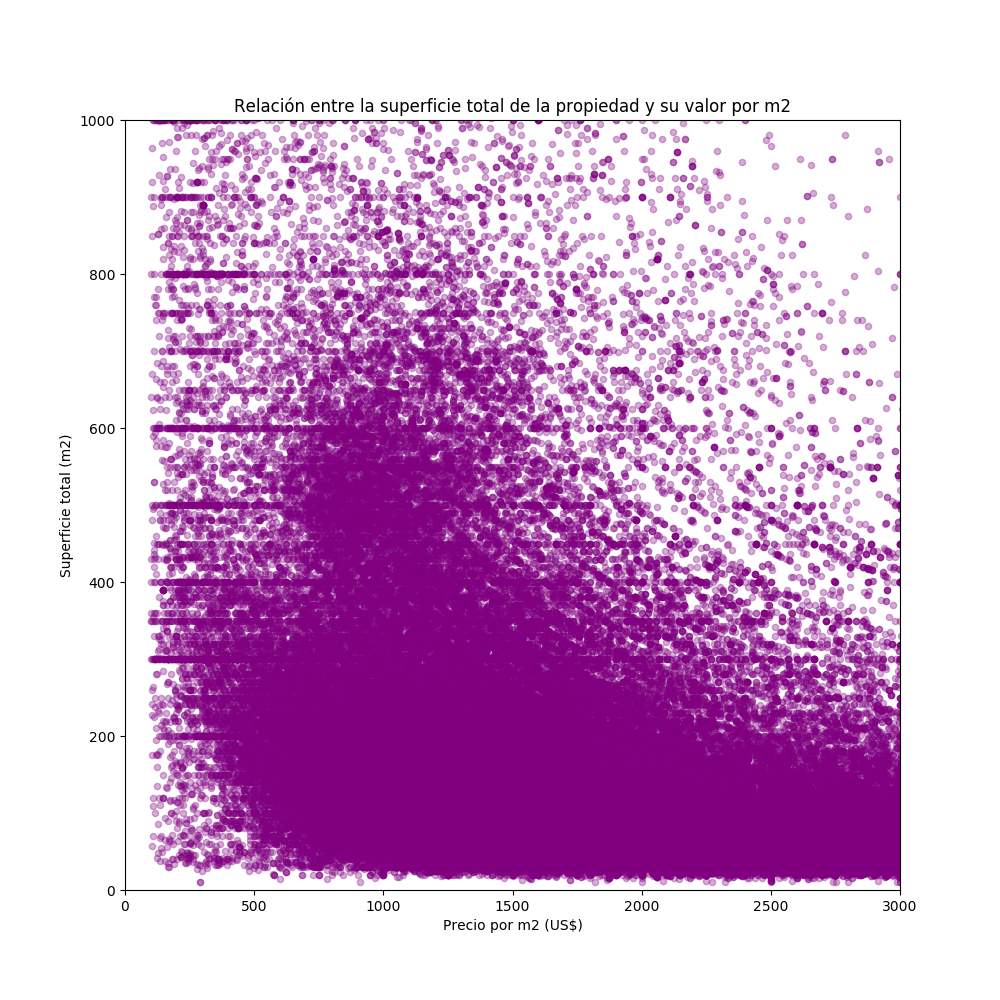

[0, 3000, 0, 1000]

In [27]:
plot_superficie_total = properties.plot.scatter('price_usd_per_m2', 'surface_in_m2', alpha=0.32, color = 'purple', title = "Relación entre la superficie total de la propiedad y su valor por m2")
plot_superficie_total.set_xlabel("Precio por m2 (US$)")
plot_superficie_total.set_ylabel("Superficie total (m2)")
plot_superficie_total.axis([0,3000,0,1000])

Observamos que hay una tendencia a que, a mayor precio, hay una menor densidad de propiedades de superficies grandes. Esto puede entenderse mejor mostrando las propiedades de los registros de tipo departamento.

In [28]:
apartments[['price_usd_per_m2', 'surface_in_m2']].describe()

,price_usd_per_m2,surface_in_m2
count,137292.000000,137292.000000
mean,2431.409728,75.714856
std,1043.365306,98.914250
min,102.773333,10.000000
25%,1790.697674,42.000000
50%,2250.040180,57.000000
75%,2827.287710,83.000000
max,10000.000000,5194.000000


Podemos ver que los departamentos conforman aproximadamente el 45% de nuestros registros y tienen en promedio una superficie menor a los 100 m2, lo que puede explicar la mayor densidad de propiedades con superficies menores.

#### Comparación entre precio por m2 y tipo de propiedad 

En el siguiente gráfico buscamos analizar el tipo de propiedad con el promedio del precio por m2, por lo tanto agrupamos por tipo de propiedad, el cual puede ser casa, departamento, local o PH, y buscamos el precio promedio por m2

<IPython.core.display.Javascript object>


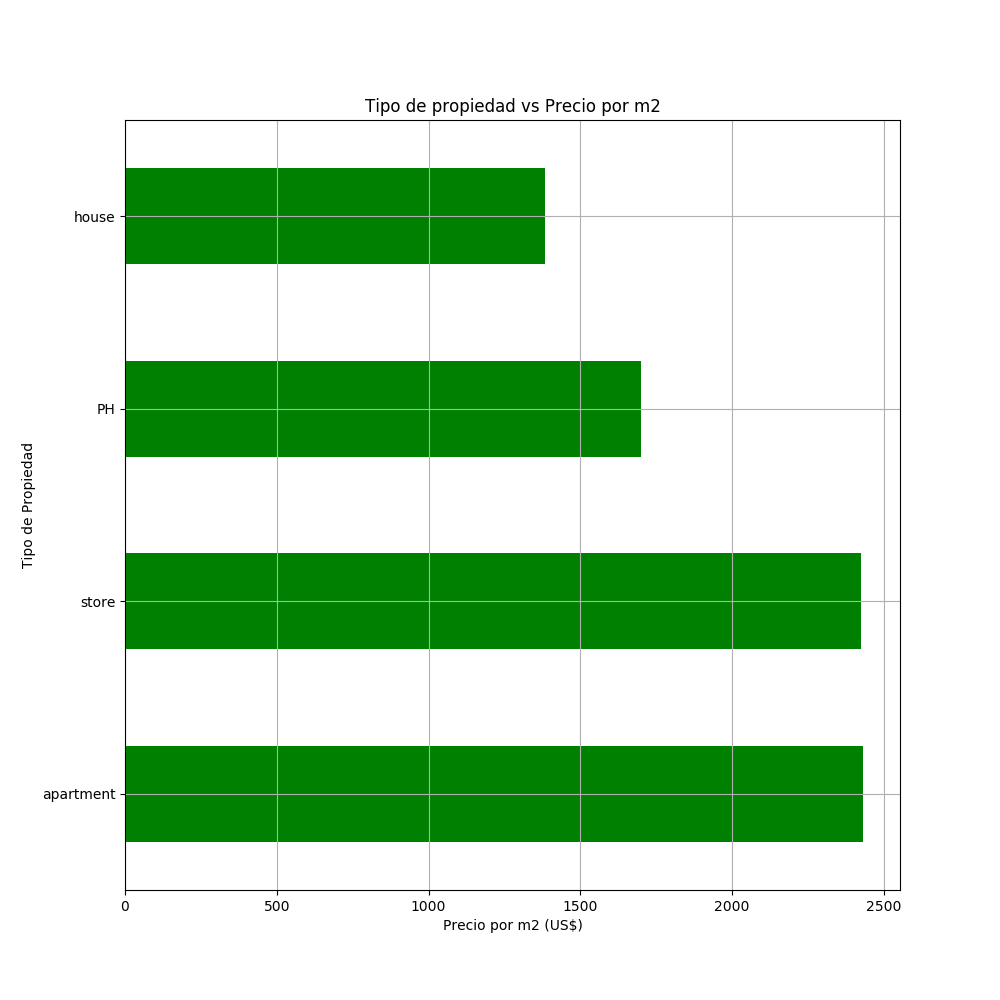

In [29]:
plot1 = properties[['property_type', 'price_usd_per_m2']].groupby(['property_type']).mean().sort_values('price_usd_per_m2', ascending = False).plot(kind = 'barh',color='green',legend=None,title='Tipo de propiedad vs Precio por m2', grid = True)
plot1.set_xlabel("Precio por m2 (US$)")
plot1.set_ylabel("Tipo de Propiedad")
#Mas caro a mas barato: departamento - store - PH - casa


**Conclusión**: los tipos de propiedad con mayor precio por m2 son los departamentos y los locales, mientras que las casas tiene los menores precios por m2. Esto puede deberse a que los locales y departamentos suelen ubicarse en las zonas mas densamente pobladas, donde mayor demanda de propiedades hay, ya sea para vivir como para abrir un negocio.

#### Evolución del precio según el piso en el que esta el departamento

La mayoría de las casas y locales tiene entre uno y dos pisos, por lo tanto proponemos quedarnos solo con los departamentos. Además solo mostraremos en el plot los pisos que tengan mas de 200 registros, para hacer un análisis más general y que se pueda visualizar mejor.

<IPython.core.display.Javascript object>


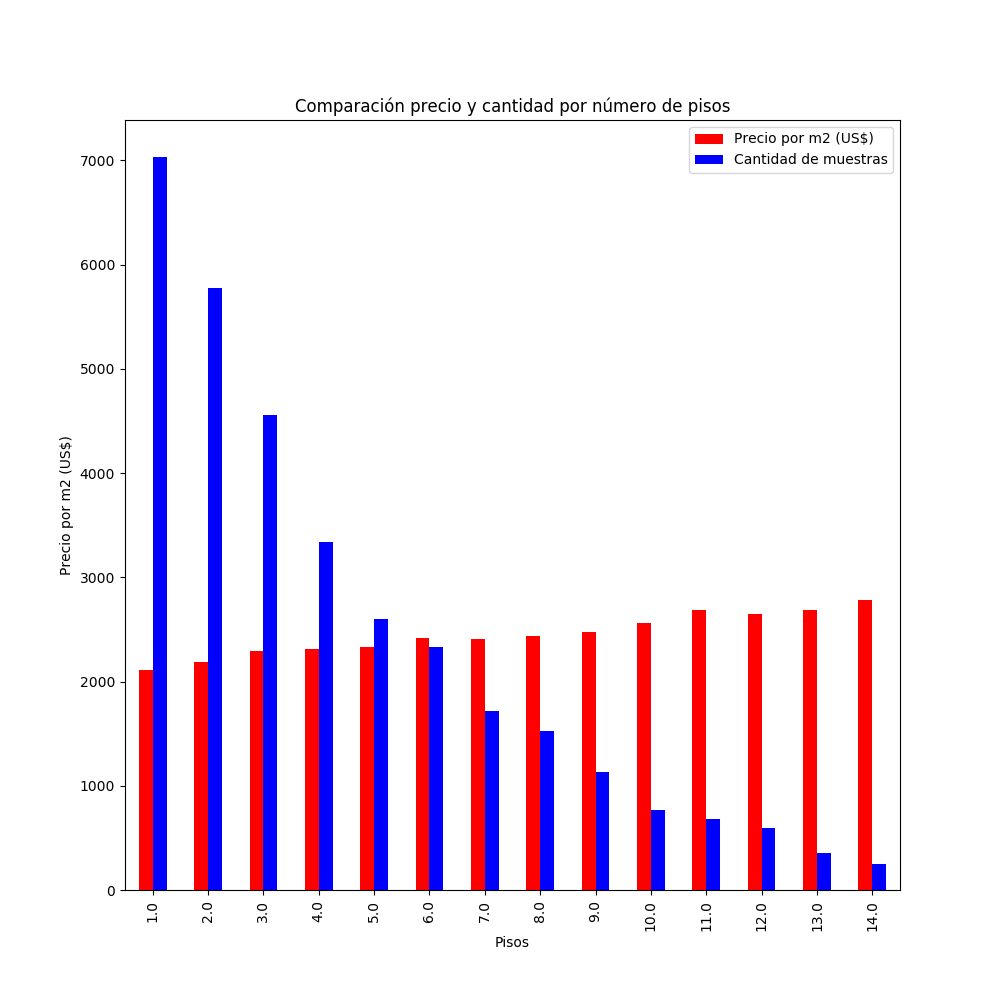

In [30]:
df_por_piso = apartments[['floor', 'price_usd_per_m2']]

df_por_piso = df_por_piso.groupby(['floor']).agg([np.mean, np.size]).reset_index()

df_por_piso = df_por_piso.loc[df_por_piso[('price_usd_per_m2', 'size')] >= 200,:]
df_por_piso_plot = df_por_piso.plot(kind='bar',color=['red','blue'],x = 'floor', y = [('price_usd_per_m2', 'mean'),('price_usd_per_m2', 'size')],title='Comparación precio y cantidad por número de pisos')
df_por_piso_plot.set_xlabel("Pisos")
df_por_piso_plot.set_ylabel("Precio por m2 (US$)")
df_por_piso_plot.legend(labels = ['Precio por m2 (US$)', 'Cantidad de muestras'])

**Conclusión**: a medida que se aumenta el piso hay menos muestras y el precio asciende, por lo tanto habrá menos departamentos en el piso 14 que en el piso 1, y en caso de que en ambos pisos haya un departamento exactamente igual al otro, el del piso alto tenderá a ser mas caro. Puede explicarse por las restricciones a la altura máxima que tienen los diferentes barrios a la hora de construir, por lo que a medida que aumenta la cantidad de pisos, se reducen los lugares posibles donde puede ubicarse. Además, sólo tiene sentido construir edificios altos en zonas densamente pobladas, por lo que aumentará la demanda de propiedades, aumentando el precio.

#### Barrios más altos en número de pisos

En el siguiente gráfico la idea es representar los 15 barrios de Capital Federal y G.B.A que en promedio sean más altos. Nos quedaremos sólo con los registros cuyo piso son menor a 50, y sólo mostraremos los barrios con mas de 100 registros, para limpiar el plot de datos irreales. Al igual que en análisis anterior, sólo consideraremos los departamentos.

<IPython.core.display.Javascript object>


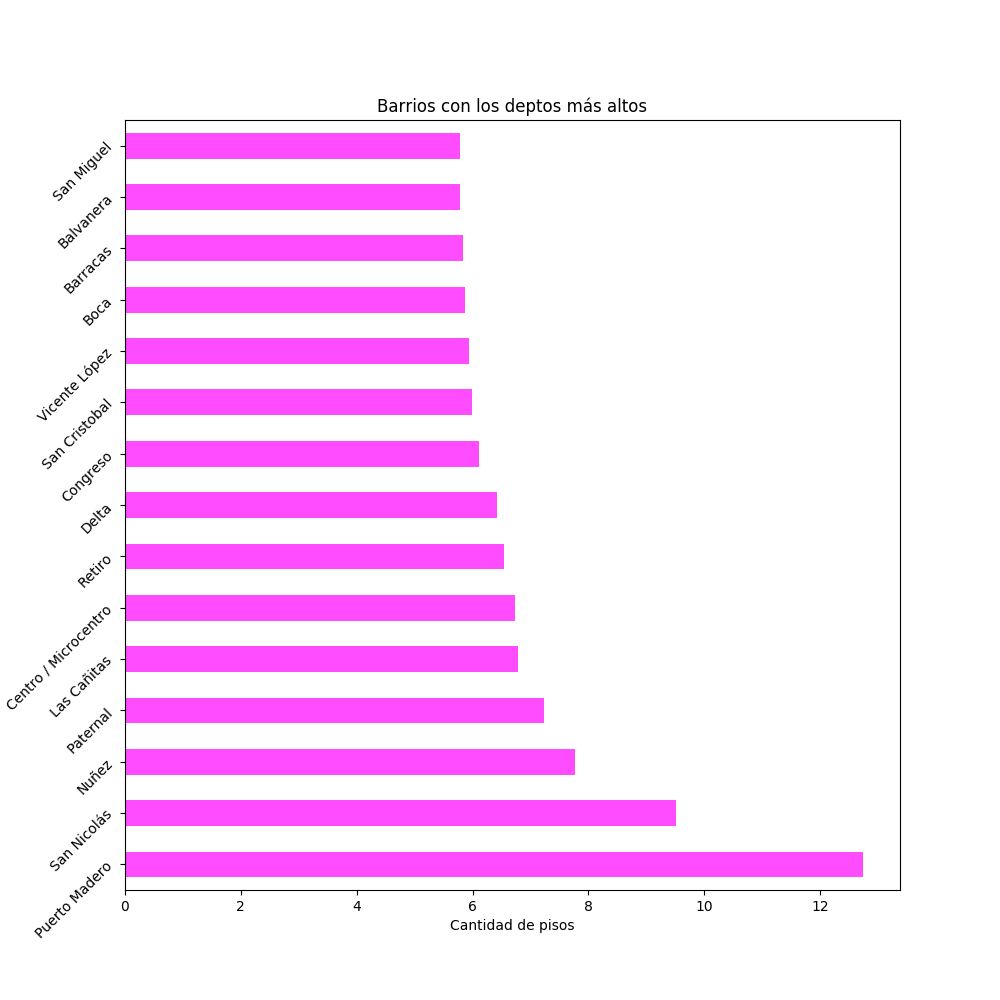

In [31]:
df_por_piso = apartments
df_por_piso = df_por_piso[df_por_piso['floor'] < 50]
df_por_piso = df_por_piso.groupby(['place_name']).agg([np.mean, np.size]).reset_index()

df_por_piso = df_por_piso[['place_name','floor']].loc[df_por_piso[('floor','size')]>= 100,:].sort_values([('floor','mean')],ascending=False).head(15)
df_por_piso_plot = df_por_piso.plot(kind='barh',color='fuchsia',alpha=0.7,x = ['place_name'], y = [('floor', 'mean')],title='Barrios con los deptos más altos', legend = False, rot = 45)
df_por_piso_plot.set_xlabel("Cantidad de pisos")
df_por_piso_plot.set_ylabel("Barrio")

**Conclusión**:
    Los 15 barrios de Capital Federal y G.B.A mas altos son: Puerto Madero, San Nicolas,Temperley, Nuñez, Paternal, Muñiz, Las Cañitas, Centro/Microcentro, San Andres, Retiro, General San Martin, Delta, Lugano, Congreso y San Miguel.

#### Barrios más caros por m2

En el siguiente gráfico queremos mostrar los 15 barrios cuyo precio por m2 sea mayor, teniéndose en cuenta solo aquellos barrios que tengan más de 50 propiedades publicadas

<IPython.core.display.Javascript object>


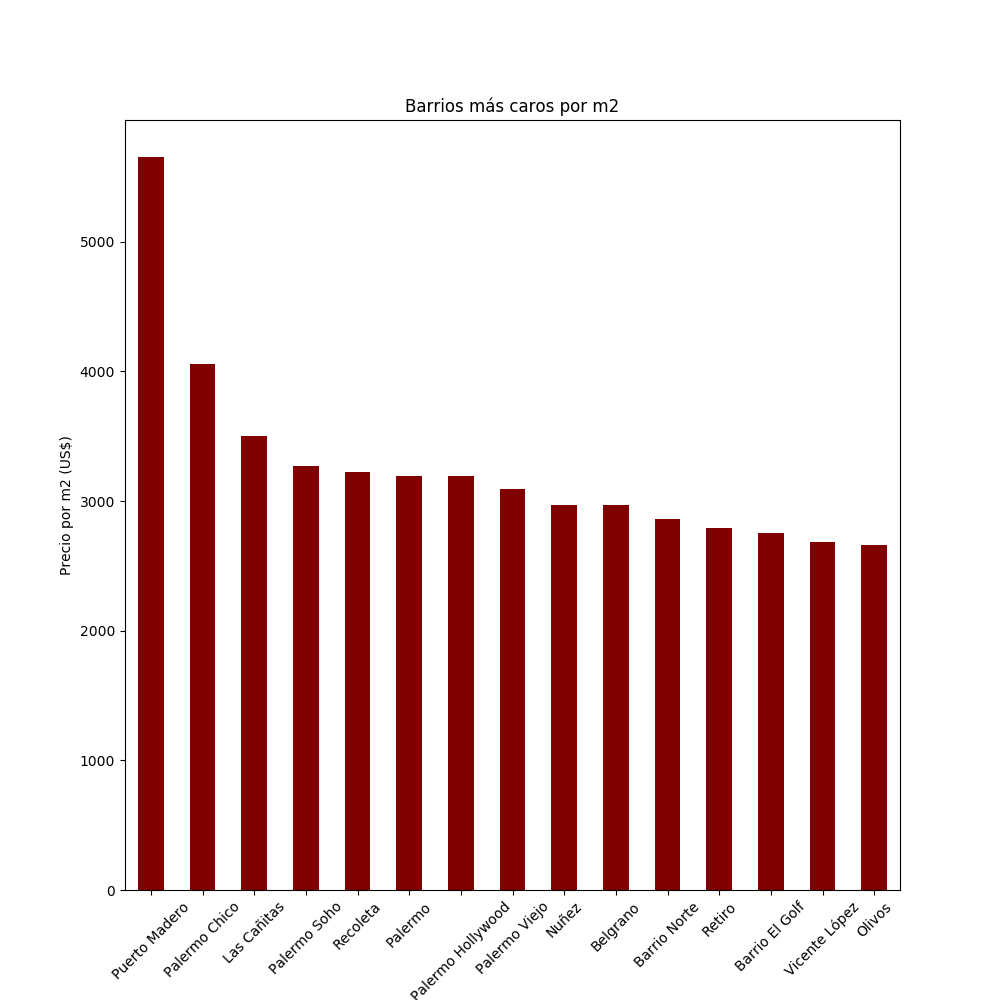

In [32]:
df_por_barrio = properties[['place_name', 'price_usd_per_m2']].groupby('place_name').agg([np.mean,np.size]).sort_values(('price_usd_per_m2', 'mean'), ascending = False).reset_index()

df_por_barrio = df_por_barrio.loc[df_por_barrio[('price_usd_per_m2', 'size')] > 50,:].head(15)
df_por_barrio_plot = df_por_barrio.plot(kind='bar',color='maroon',x = ['place_name'], y = [('price_usd_per_m2', 'mean')],title='Barrios más caros por m2', legend = False, rot = 45)
df_por_barrio_plot.set_xlabel("Barrio")
df_por_barrio_plot.set_ylabel("Precio por m2 (US$)")

**Conclusión**:
    Los 15 barrios mas caros de Capital Federal y G.B.A son: Puerto Madero, Palermo Chico, Las Cañitas, Palermo Soho, Recoleta, Palermo Hollywood, Palermo, Palermo Viejo, Boedo, Nuñez, Belgrano, Barrio Norte, Retiro, Barrio El Golf y Vicente Lopez. De este plot se pueden desprender varias conclusiones. Por un lado, la mayoria de los barrios (salvo Boedo y Barrio El Golf) estan pegados o muy cercanos al Río de la Plata. Por el otro, excepto Barrio El Golf (zona de barrios cerrados) y Vicente Lopez, son todos barrios de CABA.

#### Barrios con departamentos más caros

En el siguiente gráfico queremos mostrar los 15 barrios cuyo precio por m2 de departamentos sea mayor, teniéndose en cuenta solo aquellos barrios que tengan mas de 50 departamentos publicados

<IPython.core.display.Javascript object>


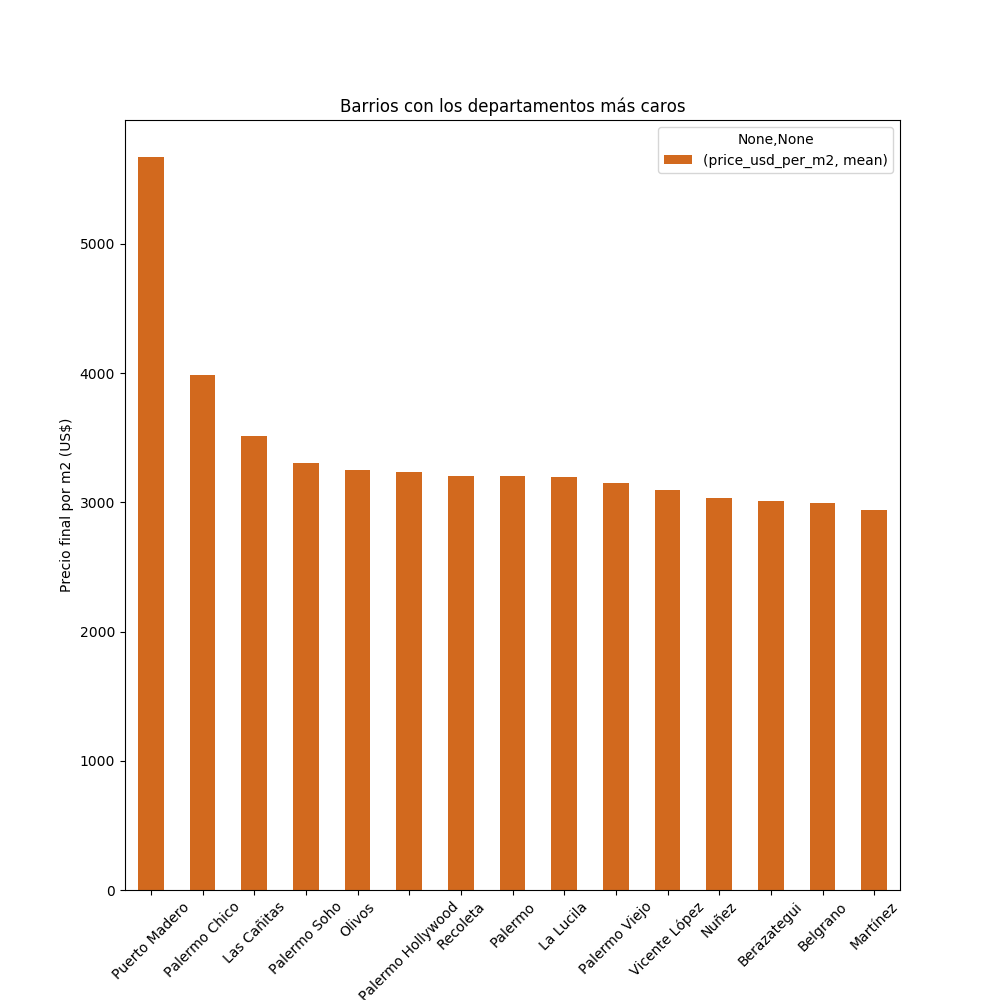

In [33]:
df_barrios = apartments.groupby('place_name').agg([np.mean,np.size,np.std,np.max,np.min]) 
df_barrios = df_barrios.sort_values([('price_usd_per_m2','mean')],ascending=False).loc[df_barrios[('price_usd_per_m2','size')]>50]
df_barrios_plot = df_barrios.head(15).plot(kind='bar',y = [('price_usd_per_m2', 'mean')],title='Barrios con los departamentos más caros',rot = 45,stacked=True,color = ['chocolate'])
df_barrios_plot.set_xlabel("Barrio")
df_barrios_plot.set_ylabel("Precio final por m2 (US$)")

**Conclusión**: Si bien Puerto Madero es el barrio que cuenta con los departmentos más caros y más altos, no se cumple para el resto de los barrios que a mayor altura, mayor precio por m2. En cuanto a la diferencia con el gráfico de los barrios más caros, aunque parece que representan los mismos datos, se puede observar que desde la 5 posición empiezan a cambiar los barrios, con Olivos reemplazando a Recoleta en la quinta posición de barrio con departamentos más caros. 

#### Barrios con las casas más caras

En el siguiente gráfico queremos mostrar los 15 barrios cuyo precio por m2 de casas sea mayor, teniéndose en cuenta solo aquellos barrios que tengan mas de 50 casas publicadas.

<IPython.core.display.Javascript object>


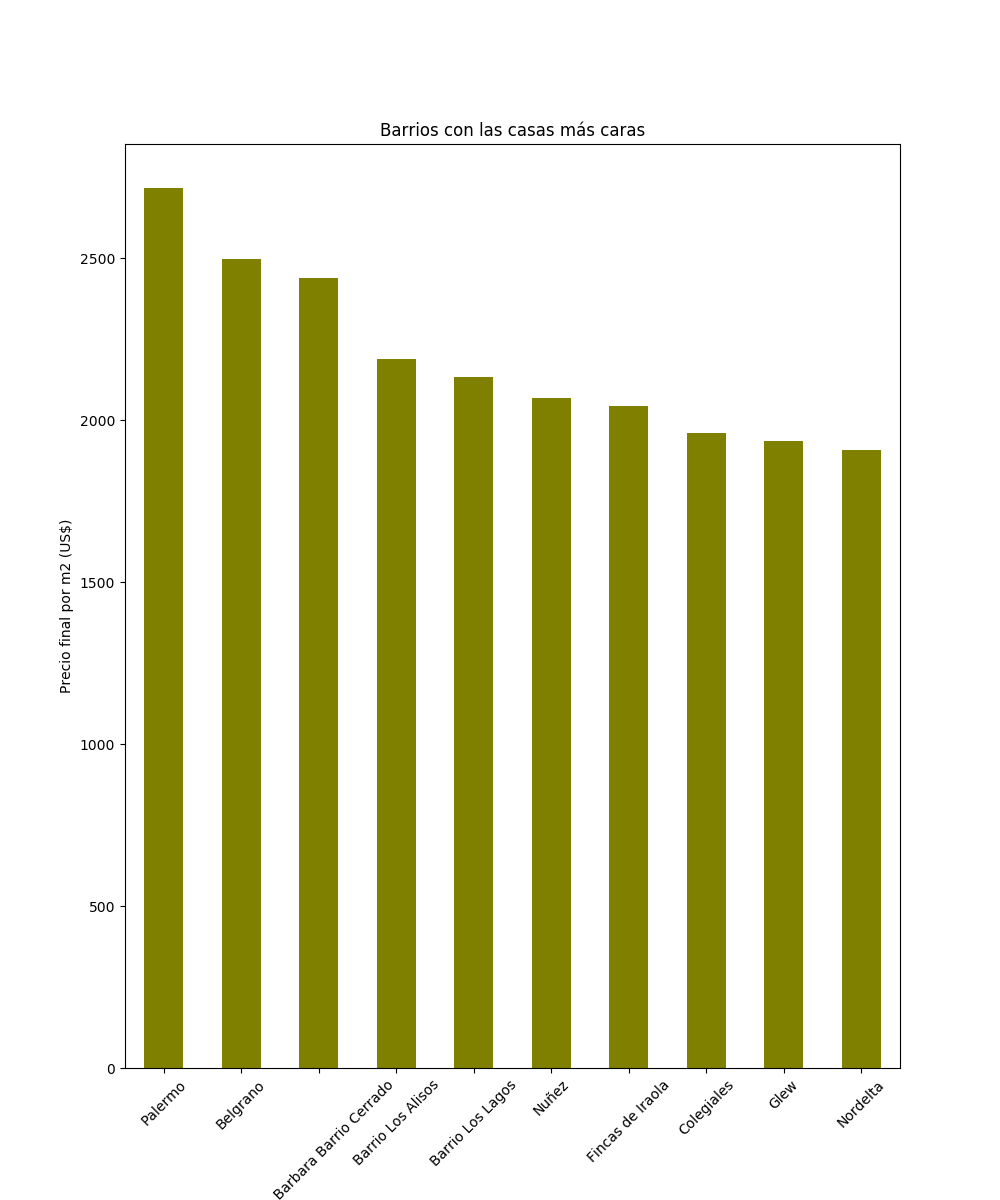

In [34]:
prop_house_complete = properties.loc[properties.property_type.str.contains('house'),:]
prop_house = prop_house_complete[['place_name', 'price_usd_per_m2']].groupby('place_name').agg([np.mean, np.size])
df_house= prop_house.loc[prop_house[('price_usd_per_m2','size')] > 50,:].reset_index().sort_values([('price_usd_per_m2','mean')],ascending=False).head(10)
df_house = df_house.plot(kind='bar',color='olive',x = ['place_name'], y = [('price_usd_per_m2', 'mean')],title='Barrios con las casas más caras', legend = False, rot = 45, figsize=(10,12))
df_house.set_xlabel("Barrio")
df_house.set_ylabel("Precio final por m2 (US$)")

**Conclusión**: Se puede ver que este gráfico cambia mucho con los anteriores. Vemos que dentro de los barrios con las casas mas caras hay varios barrios cerrados, los cuales es esperable que tengan un valor de propiedad alto. Además, aparecen barrios que son más bajos, como Palermo, Belgrano y Colegiales, que no aparecen entre los más altos.

#### Barrios con los locales más caros

En el siguiente gráfico queremos mostrar los 15 barrios cuyo precio por m2 de locales sea mayor, teniéndose en cuenta solo aquellos barrios que tengan mas de 15 locales publicados, ya que hay muy pocos barrios que tengan más de 50 locales publicados.

<IPython.core.display.Javascript object>


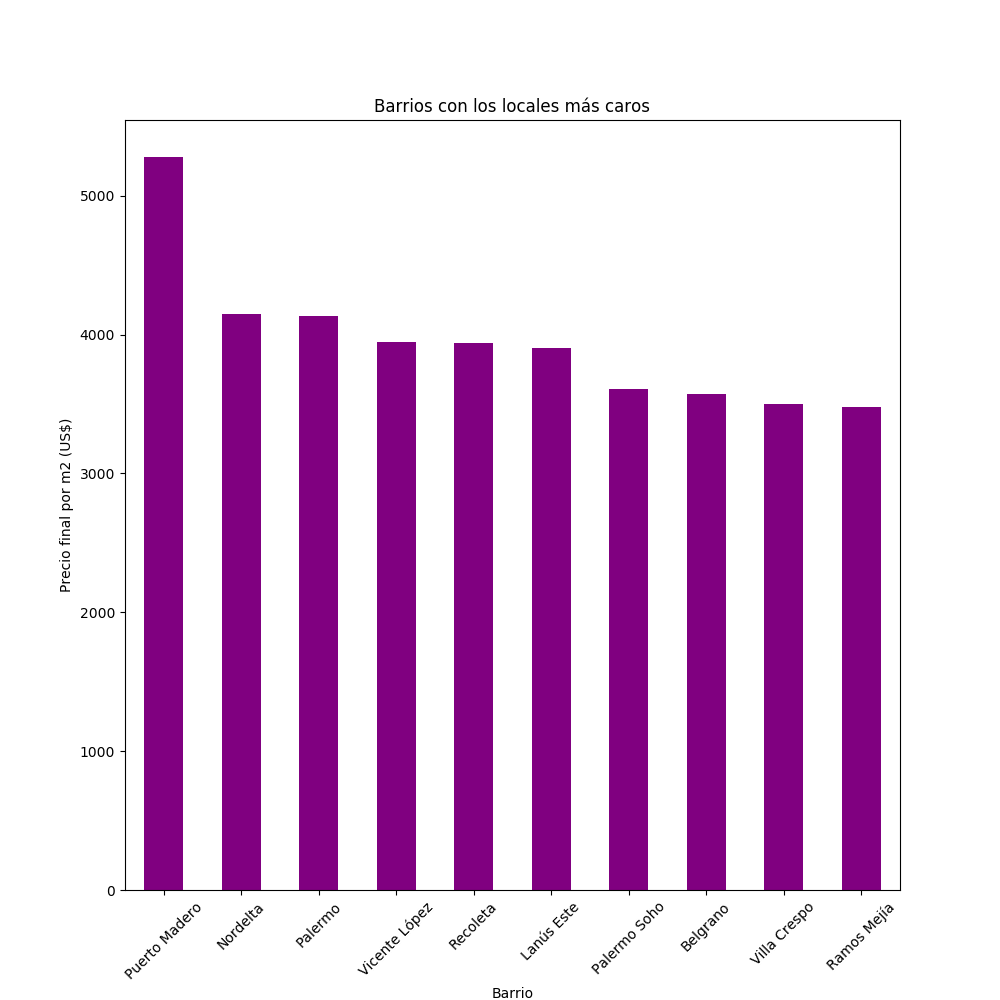

In [35]:
prop_stores_complete = properties.loc[properties.property_type.str.contains('store'),:]
prop_stores = prop_stores_complete[['place_name', 'price_usd_per_m2']].groupby('place_name').agg([np.mean, np.size])
df_stores= prop_stores.loc[prop_stores[('price_usd_per_m2','size')] > 15,:].reset_index().sort_values([('price_usd_per_m2','mean')],ascending=False).head(10)
df_stores = df_stores.plot(kind='bar',color='purple',x = ['place_name'], y = [('price_usd_per_m2', 'mean')],title='Barrios con los locales más caros', legend = False, rot = 45)
df_stores.set_xlabel("Barrio")
df_stores.set_ylabel("Precio final por m2 (US$)")

**Conclusión**: Vemos que coincide los barrios que tienen los locales más caros con los barrios mas caros de Capital y G.B.A, agregando sorpresas como Lanus Este y Villa Crespo.

#### Relación de la cantidad de cuartos y 'final_price_usd_per_m2'

En este gráfico buscamos mostrar la relacion entre el precio entre la cantidad de cuartos y el precio por m2, tomando aquellos en los cuales haya una muestra mayor a 100. No tendremos en cuenta los locales, para hacer un análisis más real sobre viviendas.

<IPython.core.display.Javascript object>


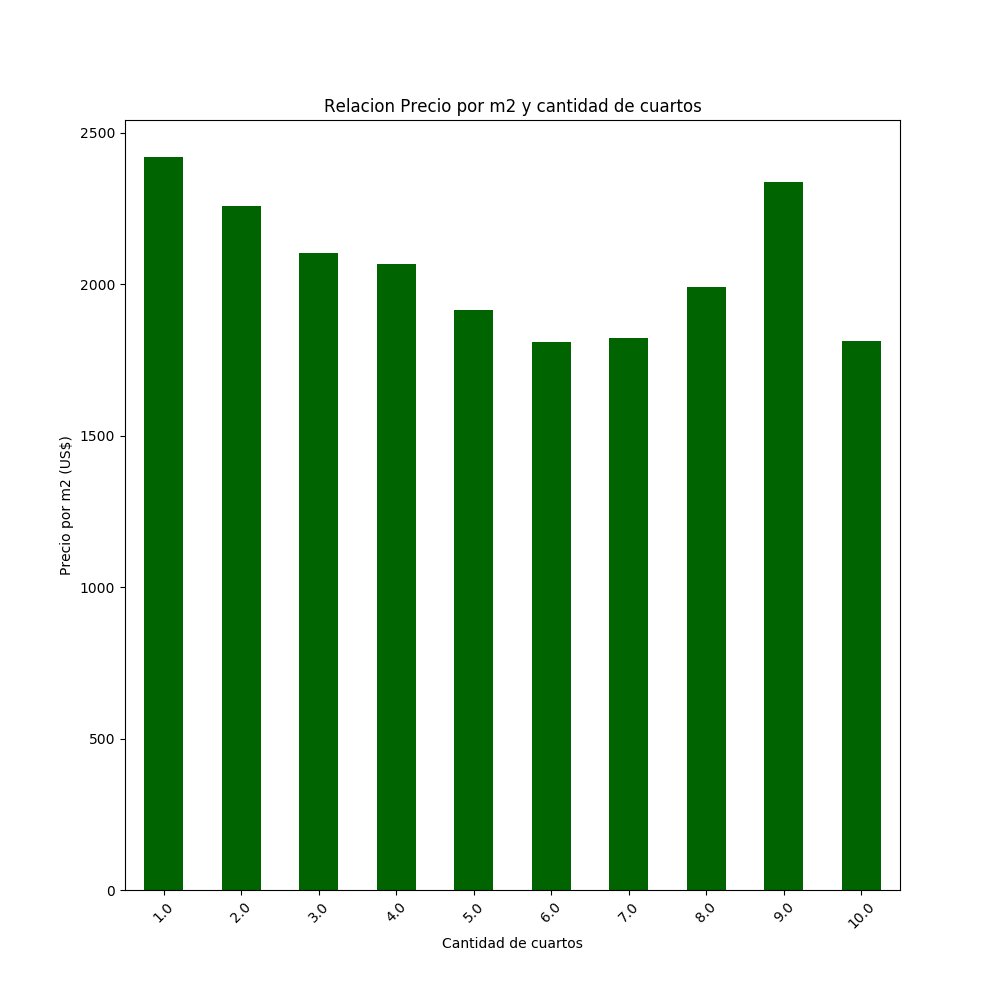

In [36]:
sacar_stores = properties.property_type.str.contains('stores')
df_por_cuartos = properties[np.logical_not(sacar_stores)]
df_por_cuartos = df_por_cuartos[['rooms', 'price_usd_per_m2']].groupby(['rooms']).agg([np.mean,np.size]).reset_index()

df_por_cuartos = df_por_cuartos.loc[df_por_cuartos[('price_usd_per_m2', 'size')] >= 100,:]
df_por_cuartos_plot = df_por_cuartos.plot(kind='bar',color='darkgreen', x = ['rooms'], y = [('price_usd_per_m2', 'mean')],title='Relacion Precio por m2 y cantidad de cuartos', legend = False, rot = 45)
df_por_cuartos_plot.set_xlabel('Cantidad de cuartos')
df_por_cuartos_plot.set_ylabel('Precio por m2 (US$)')

**Conclusión**: podemos concluir que los monoambientes son los que tienen mayor precio por m2, y disminuye hasta los que tienen 6 habitaciones, donde a partir de ahi empieza a aumentar hasta llegar a los que tienen 10 habitaciones que vuelve a disminuir. Podríamos explicar este comportamiento sabiendo que los monoambientes abundan en barrios densamente poblados, apreciandose el m2. El descenso posterior puede explicarse porque a medida que aumenta la cantidad de cuartos, y por lo tanto la cantidad de m2 de las viviendas, suelen ubicarse en zonas mas baratas y barrios mas alejados del centro neurálgico de la ciudad, no teniendo tanto sentido edificaciones altas con gran cantidad de monoambientes, ya que hay menos demanda de vivienda. La última subida, de más dificil análisis, creemos que podria explicarse suponiendo que al superar un determinado número de cuartos (en el gráfico se puede ver que este límite es 7), las propiedades suelen no solo ser grandes, sino que tambien lujosas, y pueden estar ubicadas en zonas mas caras.

#### Evolución segun la fecha de creacion agrupada por mes y precio por m2

La intención en el próximo gráfico es analizar por cada mes el precio por m2 promedio de todas las propiedades, con el fin de analizar las variaciones a medida que pasa el tiempo (algo muy interesante cuando se analiza en paises con economía tan fluctuante como Argentina).

<IPython.core.display.Javascript object>


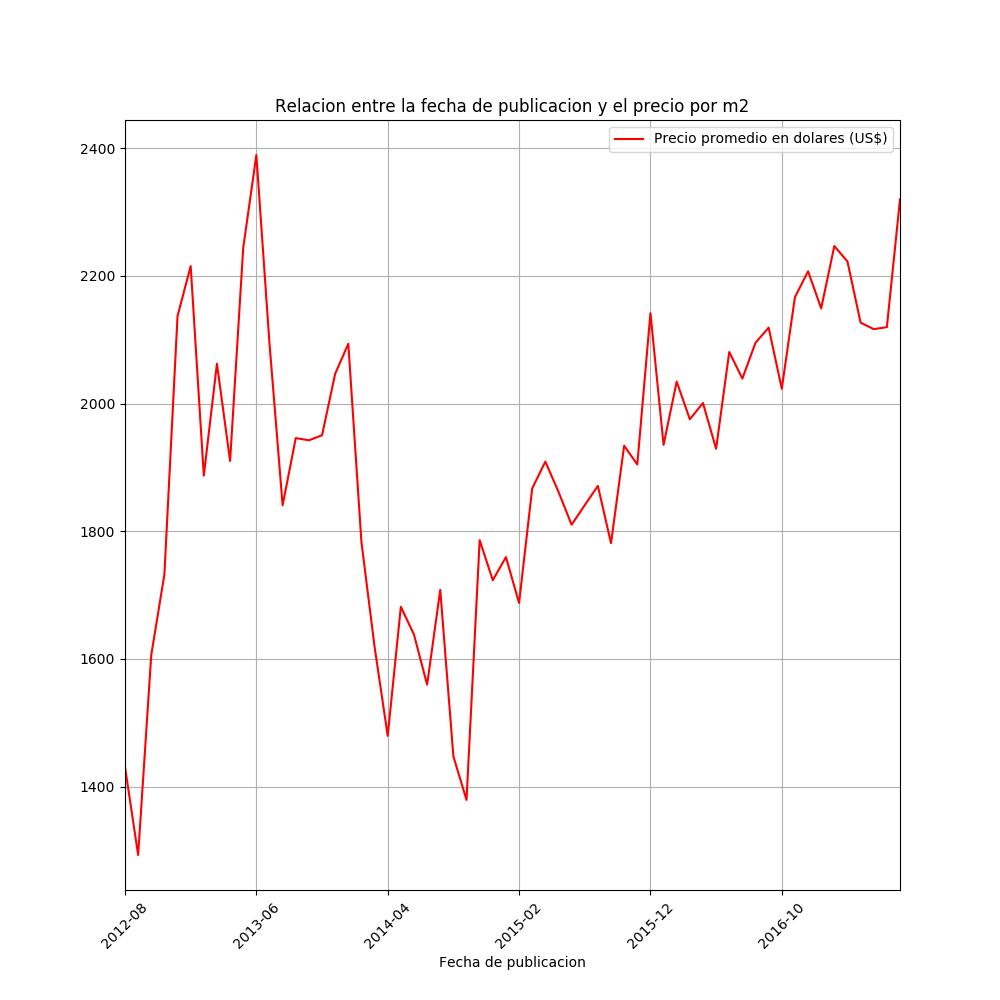

In [37]:
df_por_creacion = properties[['created_on', 'price_usd_per_m2']].groupby('created_on').agg(np.mean).reset_index()
df_por_creacion['mes'] = df_por_creacion['created_on'].apply(lambda x: x[:7]) #Me quedo solo con anio-mes
df_por_creacion = df_por_creacion.groupby('mes').agg(np.mean).reset_index().rename(columns = {'mes': "Fecha de publicacion", 'price_usd_per_m2': "Precio promedio en dolares (US$)"})
df_por_creacion_plot = df_por_creacion.plot(kind = 'line',color='red',x="Fecha de publicacion", y = "Precio promedio en dolares (US$)", grid=True, title = "Relacion entre la fecha de publicacion y el precio por m2", rot = 45)

**Conclusión**:
 Se puede ver una tendencia alcista hasta fines del 2013/principios del 2014, que ocurre una devaluación fuerte del peso y se ve una caída abrupta del precio por m2 promedio de las propiedades publicadas. Puede que algunas propiedades estuvieran fijadas en pesos, o influenciadas por su valor, o haya disminuido su precio para adaptarse al poder adquisitivo del mercado inmobiliario. Otra opción es que la página haya subido la propiedad más tarde y haya quedado un precio en pesos desactualizado. Luego de eso se ve una tendencia alcista, salvo algunas bajadas de precio, como la de fines del 2015, con el cambio de presidente, que ocurre una nueva devaluación. Puede que haya otros factores además de políticos y del precio del dolar que afecten los precios de las propiedades, como las elecciones legislativas del 2013 o presidenciales y gobernador/jefe de gobierno del 2015, afectando a la especulación del mercado.

#### ¿Cuántos metros me compro con 100 mil dólares por barrio?

En el siguiente gráfico se muestra los 15 barrios de Capital Federal y G.B.A en los cuales se pueden menos m2 con 100.000 dólares, tomando sólo aquellos que tienen una muestra mayor a 50 casos.

<IPython.core.display.Javascript object>


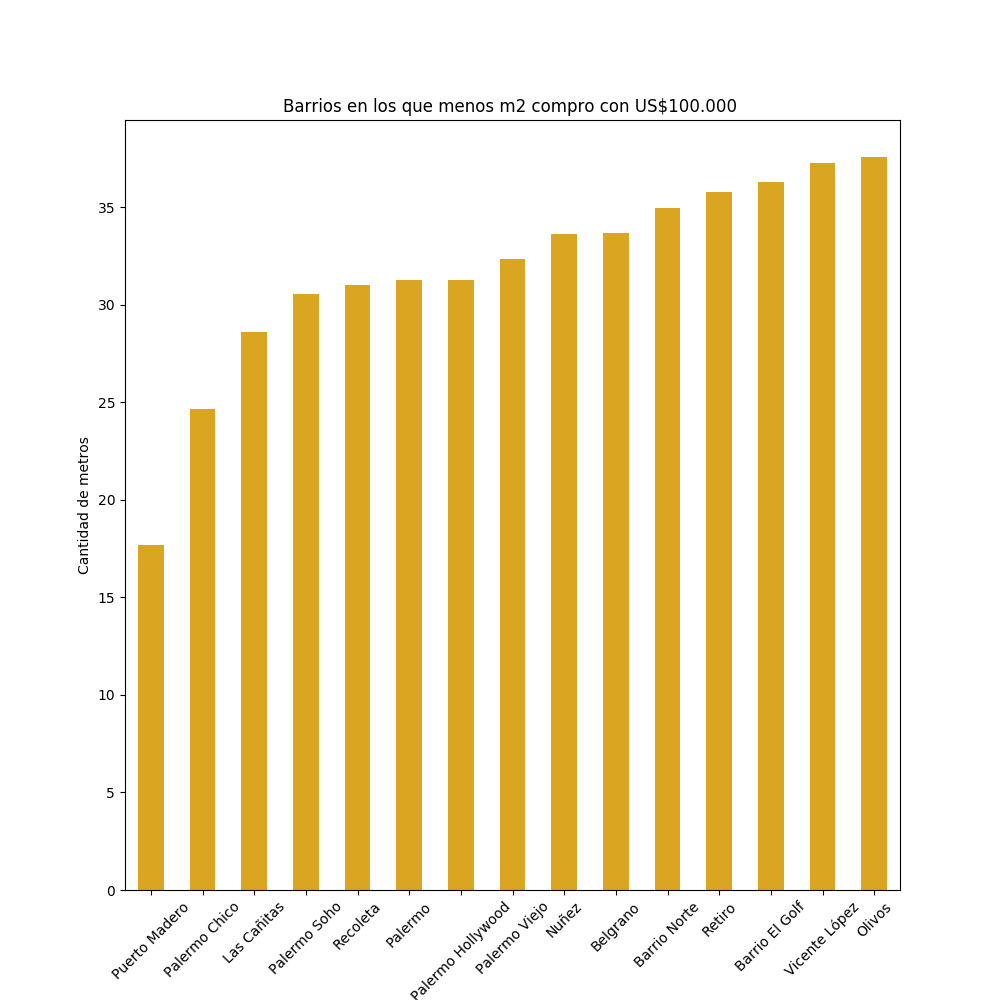

In [38]:
df_100_mil_dolares_por_barrio = properties[['place_name', 'price_usd_per_m2']].groupby('place_name').agg([np.mean, np.size])
df_100_mil_dolares_por_barrio = df_100_mil_dolares_por_barrio.loc[df_100_mil_dolares_por_barrio[('price_usd_per_m2','size')] > 50,:]
df_100_mil_dolares_por_barrio['m2 con 100mil usd'] = 100000/df_100_mil_dolares_por_barrio[('price_usd_per_m2','mean')]
df_100_mil_dolares_por_barrio = df_100_mil_dolares_por_barrio.reset_index().sort_values('m2 con 100mil usd')
df_100_mil_dolares_por_barrio_plot = df_100_mil_dolares_por_barrio[:15].plot(kind='bar',color='goldenrod', x='place_name', y='m2 con 100mil usd', rot=45, legend = False, title = "Barrios en los que menos m2 compro con US$100.000 ")
df_100_mil_dolares_por_barrio_plot.set_xlabel('Barrio')
df_100_mil_dolares_por_barrio_plot.set_ylabel('Cantidad de metros')

**Conclusión**: Los barrios en los que se pueden comprar menos m2 con 100.000 dolares son: Puerto Madero, Palermo Chico, Las Cañitas, Palermo Soho, Recoleta, Palermo Hollywood, Palermo, Palermo Viejo, Boedo, Nuñez, Belgrano, Barrio Norte, Retiro, Barrio El Golf y Vicente Lopez. También vemos que lógicamente coincide con el gráfico de barrios más caros. Es un gráfico que representa lo mismo que el del precio por m2, de una forma diferente, haciendo incapie en el poder de compra de 100.000 dólares, por lo que se podrian desprender las mismas conclusiones que de dicho plot.

# Tipos de propiedad por barrio

Ahora armamos un dataframe llamado df_por_barrio, en el cual se agrupa por cada barrio cuántas propiedades tiene, dividida por tipo de propiedad y ordenada por la cantidad total de propiedades en forma descendente, quedándonos sólo con los que tengan más de 50 propiedades.

In [39]:
df_por_barrio_apartment = properties.loc[properties['property_type'] == 'apartment',['place_name', 'property_type']].groupby('place_name').agg(np.size).reset_index()
df_por_barrio_apartment.columns = ['place_name','apartment']
df_por_barrio_house = properties.loc[properties['property_type'] == 'house',['place_name', 'property_type']].groupby('place_name').agg(np.size).reset_index()
df_por_barrio_house.columns = ['place_name','house']
df_por_barrio_ph = properties.loc[properties['property_type'] == 'PH',['place_name', 'property_type']].groupby('place_name').agg(np.size).reset_index()
df_por_barrio_ph.columns = ['place_name','PH']
df_por_barrio_store = properties.loc[properties['property_type'] == 'store',['place_name', 'property_type']].groupby('place_name').agg(np.size).reset_index()
df_por_barrio_store.columns = ['place_name','store']

df_por_barrio1 = pd.merge(df_por_barrio_apartment, df_por_barrio_house, how='outer')
df_por_barrio2 = pd.merge(df_por_barrio_ph, df_por_barrio_store, how='outer')
df_por_barrio = pd.merge(df_por_barrio1, df_por_barrio2, how='outer')
df_por_barrio = df_por_barrio.fillna(value = 0)

df_por_barrio['total'] = df_por_barrio['apartment'] +  df_por_barrio['house'] + df_por_barrio['PH'] + df_por_barrio['store']

#Me quedo con los barrios que tienen mas de 50 propiedades
df_por_barrio = df_por_barrio.loc[df_por_barrio['total'] > 50,:].sort_values('total',ascending=False)
df_por_barrio.info()
df_por_barrio.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 264 to 166
Data columns (total 6 columns):
place_name    221 non-null object
apartment     221 non-null float64
house         221 non-null float64
PH            221 non-null float64
store         221 non-null float64
total         221 non-null float64
dtypes: float64(5), object(1)
memory usage: 12.1+ KB


,place_name,apartment,house,PH,store,total
264,Tigre,5244.0,5106.0,29.0,48.0,10427.0
193,Nordelta,5042.0,3673.0,7.0,16.0,8738.0
43,Belgrano,7672.0,365.0,134.0,121.0,8292.0
200,Palermo,7096.0,185.0,235.0,202.0,7718.0
212,Pilar,2816.0,4753.0,37.0,96.0,7702.0


#### Barrios con mayor cantidad de propiedades publicadas

En el siguiente gráfico buscamos mostrar los barrios que tienen mayor cantidad de propiedades publicadas, sin distinción del tipo de propiedad.

<IPython.core.display.Javascript object>


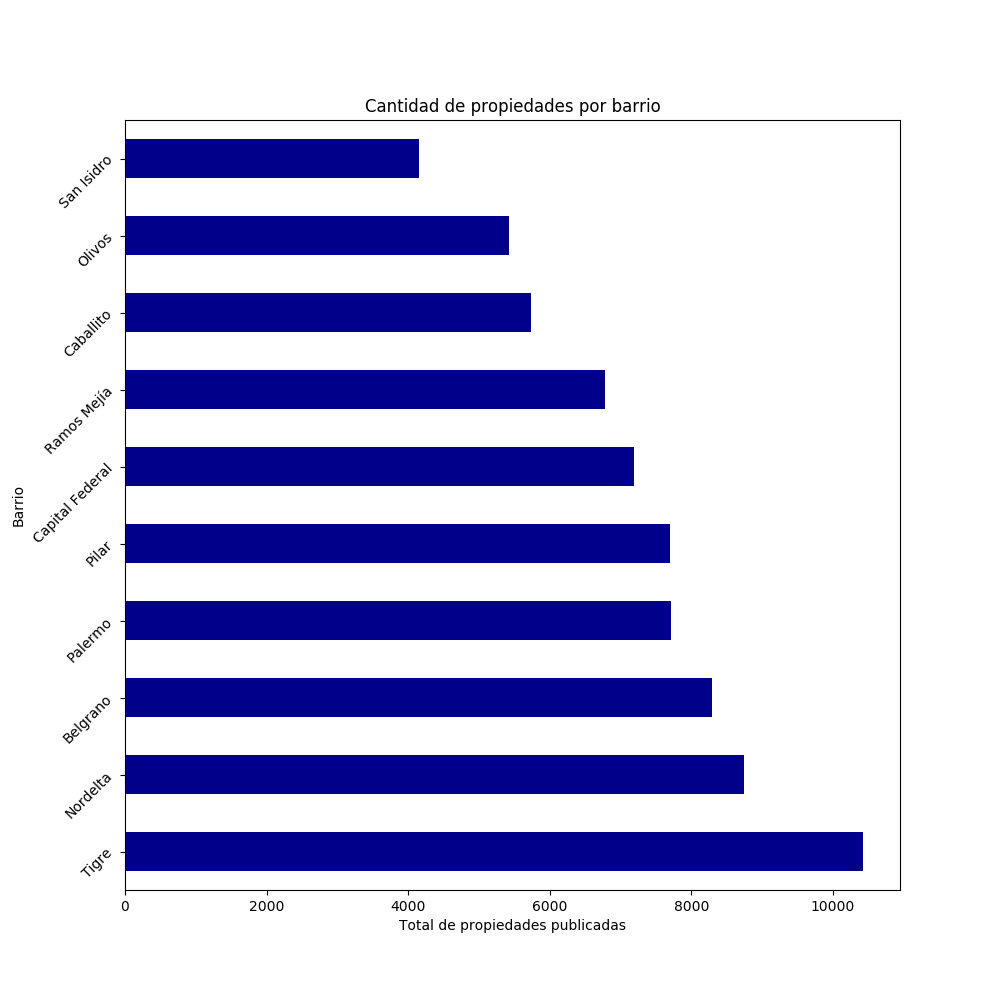

In [40]:
df_por_barrio_plot = df_por_barrio[:10].plot(kind = 'barh',color='darkblue', x='place_name', y = 'total', rot=45, title='Cantidad de propiedades por barrio', legend = False)
df_por_barrio_plot.set_xlabel('Total de propiedades publicadas')
df_por_barrio_plot.set_ylabel('Barrio')

**Conclusión**: Podemos observar que Properati tiene muchas publicaciones en la zona norte de G.B.A ya que dentro del top 10 de barrios con mas publicaciones encontramos 5 barrios de la misma: Tigre, Nordelta, Pilar, Olivos y San Isidro. Esto puede ser producto de un mayor movimiento inmboliario en la zona, o a una mayor inversion de publicidad por parte de la empresa en dichas zonas.

#### Barrios con mayor proporción de departamentos

En el siguiente gráfico mostramos los 10 barrios con mayor proporción de departamentos, es decir que los departamentos ocupan un porcentaje importante dentro del total de publicaciones del barrio.

<IPython.core.display.Javascript object>


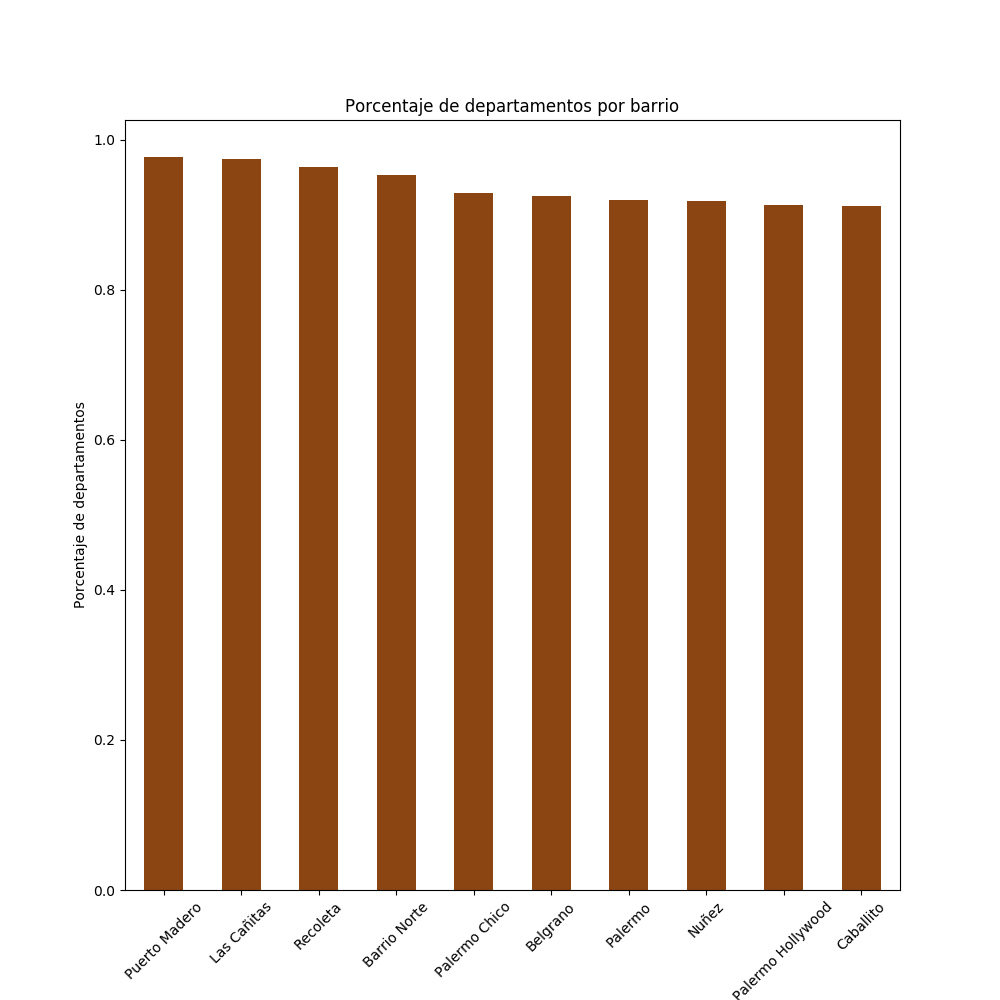

In [41]:
df_por_barrio_porcentaje_departamentos = df_por_barrio
df_por_barrio_porcentaje_departamentos['Porcentaje Apartments'] = df_por_barrio_porcentaje_departamentos['apartment'] / df_por_barrio_porcentaje_departamentos['total']

df_por_barrio_porcentaje_departamentos = df_por_barrio_porcentaje_departamentos.sort_values('Porcentaje Apartments', ascending=False)
df_por_barrio_porcentaje_departamentos_plot = df_por_barrio_porcentaje_departamentos[:10].plot(kind = 'bar',color='saddlebrown', x='place_name',y='Porcentaje Apartments', rot = 45, title = 'Porcentaje de departamentos por barrio', legend = False)
df_por_barrio_porcentaje_departamentos_plot.set_xlabel('Barrio')
df_por_barrio_porcentaje_departamentos_plot.set_ylabel('Porcentaje de departamentos')


**Conclusión**: Los barrios con mayor porcentaje de departamentos dentro de sus publicaciones son Puerto Madero, Las Cañitas, Recoleta, Barrio Norte, Palermo Chico, Belgrano, Palermo, Nuñez, Palermo Hollywood y Caballito. Nuevamente se ve que la mayoría de los barrios, salvo Caballito, se encuentran cercanos al Rio de la Plata.

#### Barrios con mayor porcentaje de locales publicados

Buscamos lo mismo que en el anterior pero en vez de departamentos lo buscamos con el porcentaje de locales

<IPython.core.display.Javascript object>


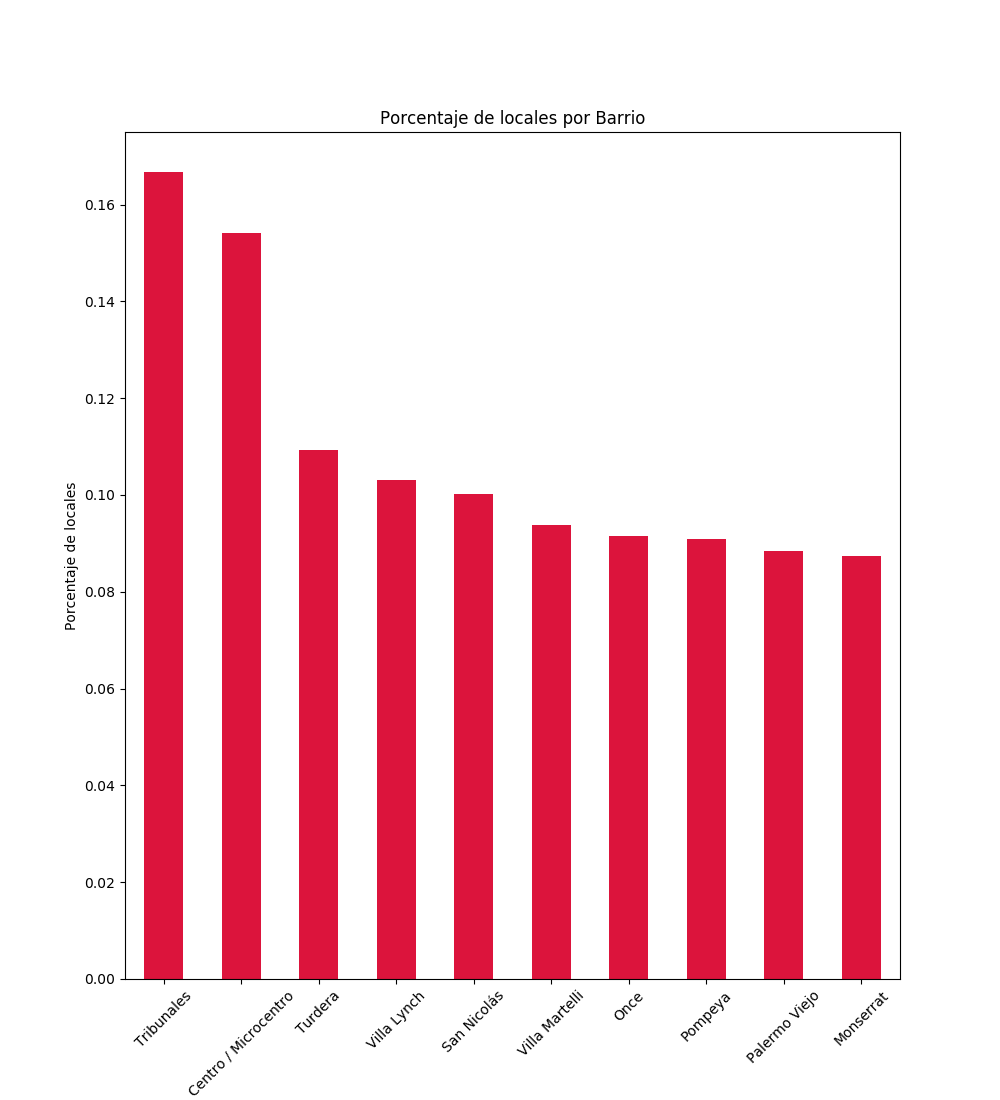

In [42]:
df_por_barrio_porcentaje_stores = df_por_barrio
df_por_barrio_porcentaje_stores['Porcentaje Stores'] = df_por_barrio_porcentaje_stores['store'] / df_por_barrio_porcentaje_stores['total']

df_por_barrio_porcentaje_stores = df_por_barrio_porcentaje_stores.sort_values('Porcentaje Stores', ascending=False)
df_por_barrio_porcentaje_stores_plot = df_por_barrio_porcentaje_stores[:10].plot(kind = 'bar',color='crimson', x='place_name', y='Porcentaje Stores', legend = False, rot = 45, title = 'Porcentaje de locales por Barrio', figsize=(10,11))
df_por_barrio_porcentaje_stores_plot.set_xlabel('Barrio')
df_por_barrio_porcentaje_stores_plot.set_ylabel('Porcentaje de locales')

**Conclusiones**: Los barrios con mayor porcentaje de locales publicados dentro de sus publicaciones son: Tribunales, Centro/Microcentro, Turdera, Villa Lynch, San Nicolas, Villa Martelli, Once, Pompeya, Palermo Viejo y Monserrat. No es sorprendente ver el gran porcentaje de propiedades que son locales comerciales cerca del centro porteño.

#### Barrios con menor porcentaje de casas publicadas

Ahora lo mismo que el anterior pero buscando el porcentaje de casas publicadas. En este caso, en vez de mostrar un plot con los barrio que mayor proporción de casas tienen, mostraremos los que menos tienen. Esta decisión la tomamos porque hay muchos barrios poco conocidos que solamente tienen casas publicadas, o con un porcentaje muy cercano a 1. Por eso, nos parecio más interesante ver el caso contrario.

<IPython.core.display.Javascript object>


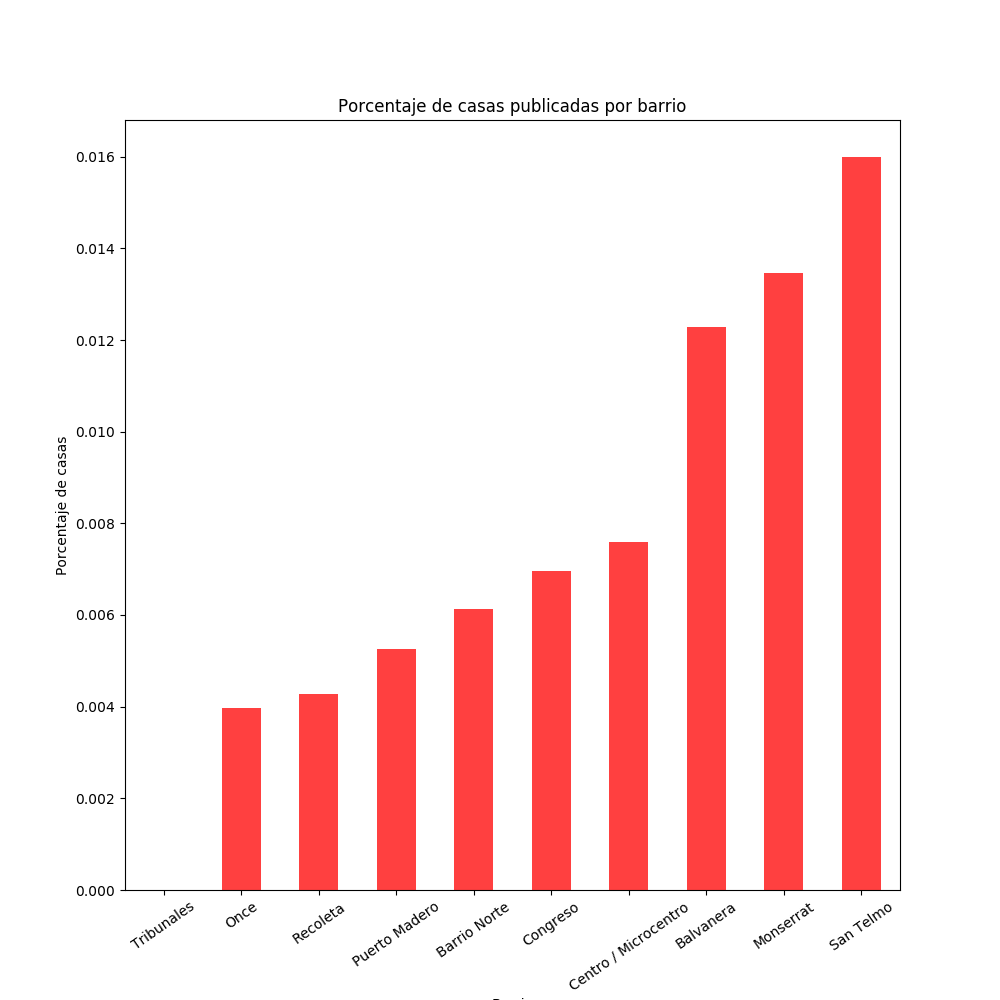

In [43]:
df_por_barrio_porcentaje_houses = df_por_barrio
df_por_barrio_porcentaje_houses['Porcentaje Houses'] = df_por_barrio_porcentaje_houses['house'] / df_por_barrio_porcentaje_houses['total']

df_por_barrio_porcentaje_houses = df_por_barrio_porcentaje_houses.sort_values('Porcentaje Houses', ascending=True)
df_por_barrio_porcentaje_houses_plot = df_por_barrio_porcentaje_houses[:10].plot(kind = 'bar',color='red',alpha=0.75, x='place_name', y='Porcentaje Houses', rot = 35, title = 'Porcentaje de casas publicadas por barrio', legend = False)
df_por_barrio_porcentaje_houses_plot.set_xlabel('Barrio')
df_por_barrio_porcentaje_houses_plot.set_ylabel('Porcentaje de casas')


**Conclusión**: Los barrios que menos porcentaje de casas publicadas tienen son Tribunales, Once, Recoleta, Puerto Madero, Barrio Norte, Congreso, Centro/Microcentro, Balvanera, Monserrat y Las Cañitas. Sorprende ver que en Tribunales no haya ninguna casa publicada, y el porcentaje tan pequeño de los barrios cercanos al Microcentro.

#### Barrios con mayor porcentaje de phs publicados

Ahora buscamos los barrios con mayor porcentaje de PHs dentro de sus publicaciones

<IPython.core.display.Javascript object>


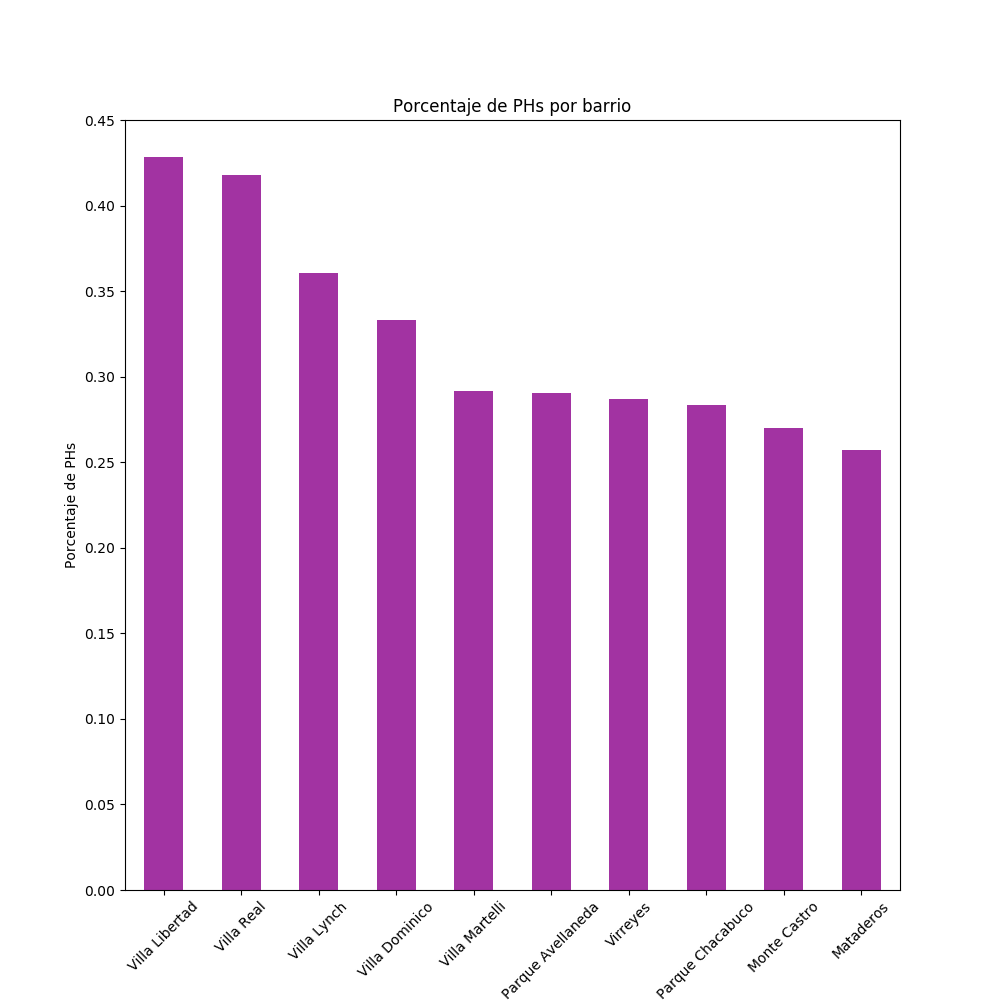

In [44]:
df_por_barrio_porcentaje_phs = df_por_barrio
df_por_barrio_porcentaje_phs['Porcentaje PHs'] = df_por_barrio_porcentaje_phs['PH'] / df_por_barrio_porcentaje_phs['total']

df_por_barrio_porcentaje_phs = df_por_barrio_porcentaje_phs.sort_values('Porcentaje PHs', ascending=False)
df_por_barrio_porcentaje_phs_plot = df_por_barrio_porcentaje_phs[:10].plot(kind = 'bar', color='darkmagenta',alpha=0.8, x='place_name', y='Porcentaje PHs', rot = 45, title= 'Porcentaje de PHs por barrio', legend = False)
df_por_barrio_porcentaje_phs_plot.set_xlabel('Barrio')
df_por_barrio_porcentaje_phs_plot.set_ylabel('Porcentaje de PHs')

**Conclusión**: a diferencia del resto de los plots del informe, se puede ver que el resultado es mucho mas diverso, viendose la mitad de los barrios de G.B.A (Villa Libertad, Villa Lynch, Villa Dominico, Villa Martelli y Virreyes), y la otra mitad de CABA (Villa Real, Parque Avellaneda, Parque Chacabuco, Monte Castro y Mataderos).

#### Barrios que muestran mayor diferencia de precio entre propiedades

En el siguiente gráfico vamos a mostrar aquellos barrios en los cuales haya más diferencia entre los precios, utilizando el desvío estándar.

<IPython.core.display.Javascript object>


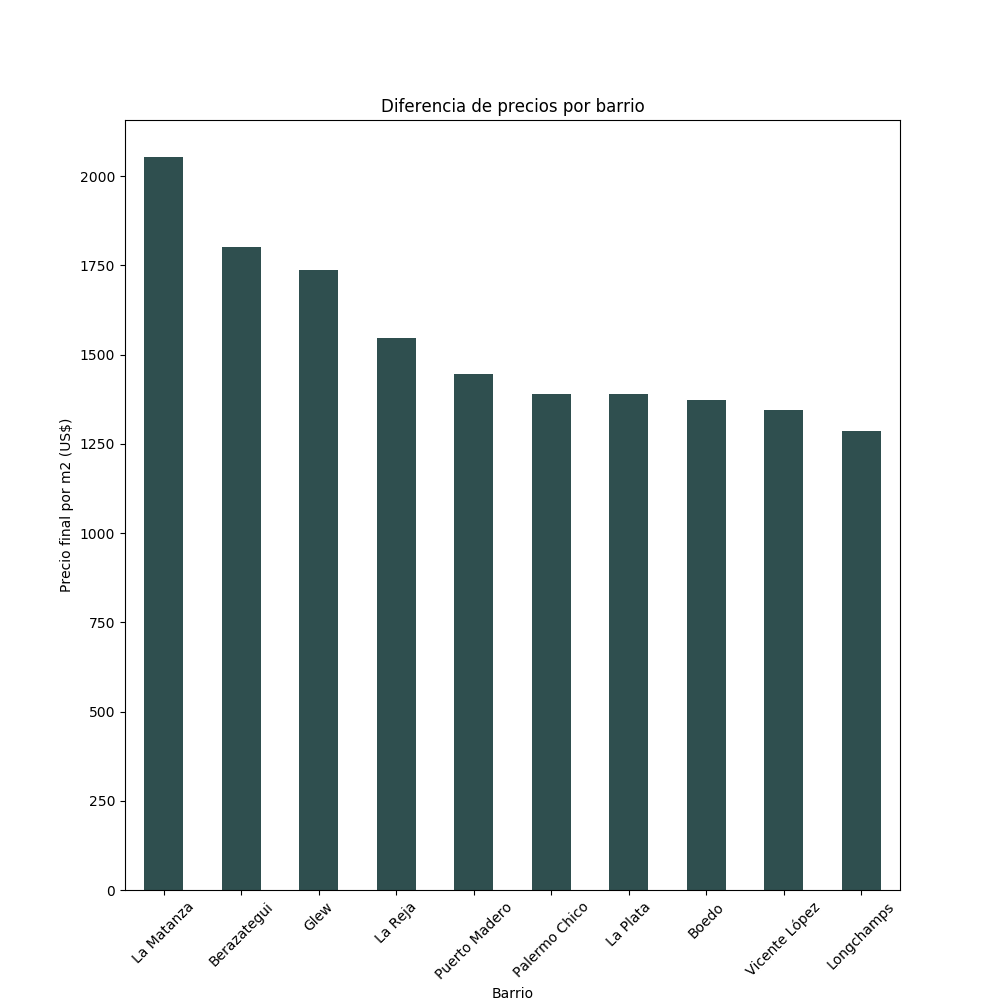

In [45]:
df_barrios = properties.groupby('place_name').agg([np.mean,np.size,np.std,np.max,np.min]) 
df_barrios = df_barrios.sort_values([('price_usd_per_m2','std')],ascending=False).loc[df_barrios[('price_usd_per_m2','size')]>100]
df_barrios_plot = df_barrios.head(10).plot(kind='bar',y = [('price_usd_per_m2', 'std')],title='Diferencia de precios por barrio',rot = 45,stacked=True,color = ['darkslategrey'], legend = False)
df_barrios_plot.set_xlabel("Barrio")
df_barrios_plot.set_ylabel("Precio final por m2 (US$)")

**Conclusión**: A excepción de Boedo, el resto de los barrios son todos de G.B.A. por lo tanto eso nos muestra que en Capital Federal los precios presentan un menor desvío, mientras que en G.B.A. los precios son mucho mas desparejos, producto de una mayor desigualdad, conviviendo en un mismo barrio zonas con propiedades caras y zonas con propiedades más baratas.

## Zonas verdes en los barrios

Extraeremos datos de un censo de arboles del Gobierno de la Ciudad de Buenos Aires (https://data.buenosaires.gob.ar/dataset/arbolado-publico-lineal). Este censo provee información geolocalizada de los árboles en el espacio público (traza urbana) de la Ciudad de Buenos Aires según su especie.

In [46]:
df_arboles = pd.read_csv('arbolado-publico-lineal.csv', low_memory=False, delimiter=';')
df_arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372699 entries, 0 to 372698
Data columns (total 21 columns):
LONG          372699 non-null object
LAT           372699 non-null object
TIPO_SITIO    372699 non-null object
ID_ARBOL      372699 non-null int64
ALTURA_TOT    372699 non-null int64
DIAMETRO      372699 non-null int64
INCLINACIO    372699 non-null int64
ID_ESPECIE    372699 non-null int64
NOMBRE_FAM    372699 non-null object
NOMBRE_GEN    372699 non-null object
NOMBRE_CIE    372699 non-null object
NOMBRE_COM    372694 non-null object
TIPO_FOLLA    372699 non-null object
ORIGEN        372699 non-null object
CODIGO_MAN    372699 non-null object
BARRIO        372699 non-null object
COMUNA        372699 non-null object
CALLE         372699 non-null object
CHAPA1        263701 non-null float64
CHAPA2        5818 non-null float64
LONG_CALLE    372698 non-null object
dtypes: float64(2), int64(5), object(14)
memory usage: 59.7+ MB


Nos quedaremos sólo con las columnas BARRIO y ID_ARBOL, para poder tener un dato numérico y poder contar la cantidad de árboles por barrio.

In [47]:
df_arboles = df_arboles[['ID_ARBOL','BARRIO']].groupby(['BARRIO']).agg(np.size).reset_index()
df_arboles.columns = ['BARRIO', 'CANTIDAD']
df_arboles = df_arboles.sort_values('CANTIDAD', ascending = False)

Ahora debemos armar un dataframe que agrupe por barrio y calcule el precio promedio en dolares por m2. Sin embargo, los barrios que aparecen en df_arboles son los 48 oficiales, mientras que Properati agrupa las propiedades de CABA en 63 barrios, muchos de ellos son 'sub-barrios', para brindar una mejor experiencia al usuario a la hora de buscar propiedades por barrio. Luego de analizar e investigar cada barrio, llegamos a la siguiente tabla de conversión:
* ABASTO -> BALVANERA
* BARRIO NORTE -> RECOLETA
* CAPITAL FEDERAL -> **X**
* CATALINAS -> BOCA
* CENTRO/MICROCENTRO -> SAN NICOLAS
* CONGRESO -> BALVANERA
* DISTRITO DE LAS ARTES -> BOCA
* LAS CANITAS -> PALERMO
* POMPEYA -> NUEVA POMPEYA
* ONCE -> BALVANERA
* PALERMO CHICO -> PALERMO
* PALERMO HOLLYWOOD -> PALERMO
* PALERMO SOHO -> PALERMO
* PALERMO VIEJO -> PALERMO
* PARQUE CENTENARIO -> CABALLITO
* TRIBUNALES -> SAN NICOLAS
* VILLA GENERAL MITRE -> VILLA GRAL. MITRE

In [48]:
df_por_barrio = properties.loc[properties['state_name']=='Capital Federal', ['place_name', 'price_usd_per_m2']]
df_por_barrio.columns = ['BARRIO', 'price_usd_per_m2']
df_por_barrio['BARRIO'] = df_por_barrio['BARRIO'].apply(lambda x: x.upper())

Unifiquemos la columna BARRIO

In [49]:
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('ABASTO'), ['BARRIO']] = 'BALVANERA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('BARRIO NORTE'), ['BARRIO']] = 'RECOLETA'
df_por_barrio = df_por_barrio[df_por_barrio['BARRIO'] != 'CAPITAL FEDERAL']
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('CATALINAS'), ['BARRIO']] = 'BOCA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('CENTRO / MICROCENTRO'), ['BARRIO']] = 'SAN NICOLAS'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('CONGRESO'), ['BARRIO']] = 'BALVANERA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('DISTRITO DE LAS ARTES'), ['BARRIO']] = 'SAN NICOLAS'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('LAS CAÑITAS'), ['BARRIO']] = 'PALERMO'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('POMPEYA'), ['BARRIO']] = 'NUEVA POMPEYA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('ONCE'), ['BARRIO']] = 'BALVANERA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('PALERMO'), ['BARRIO']] = 'PALERMO'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('PARQUE CENTENARIO'), ['BARRIO']] = 'CABALLITO'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('TRIBUNALES'), ['BARRIO']] = 'SAN NICOLAS'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('VILLA DEL PARQUE'), ['BARRIO']] = 'VILLA DEL PARQUE'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('VILLA GENERAL MITRE'), ['BARRIO']] = 'VILLA GRAL. MITRE'


# Ahora unifiquemos los acentos
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('SAN NICOLÁS'), ['BARRIO']] = 'SAN NICOLAS'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('AGRONOMÍA'), ['BARRIO']] = 'AGRONOMIA'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('VILLA PUEYRREDÓN'), ['BARRIO']] = 'VILLA PUEYRREDON'
df_por_barrio.loc[df_por_barrio.BARRIO.str.contains('CONSTITUCIÓN'), ['BARRIO']] = 'CONSTITUCION'

In [50]:
df_por_barrio = df_por_barrio.groupby('BARRIO').agg(np.mean).reset_index()

Ahora estamos en condiciones de mergear ambos dataframes, y hacer un scatter plot para ver si existe alguna relación entre la cantidad de verde de un barrio con su precio por m2.

<IPython.core.display.Javascript object>


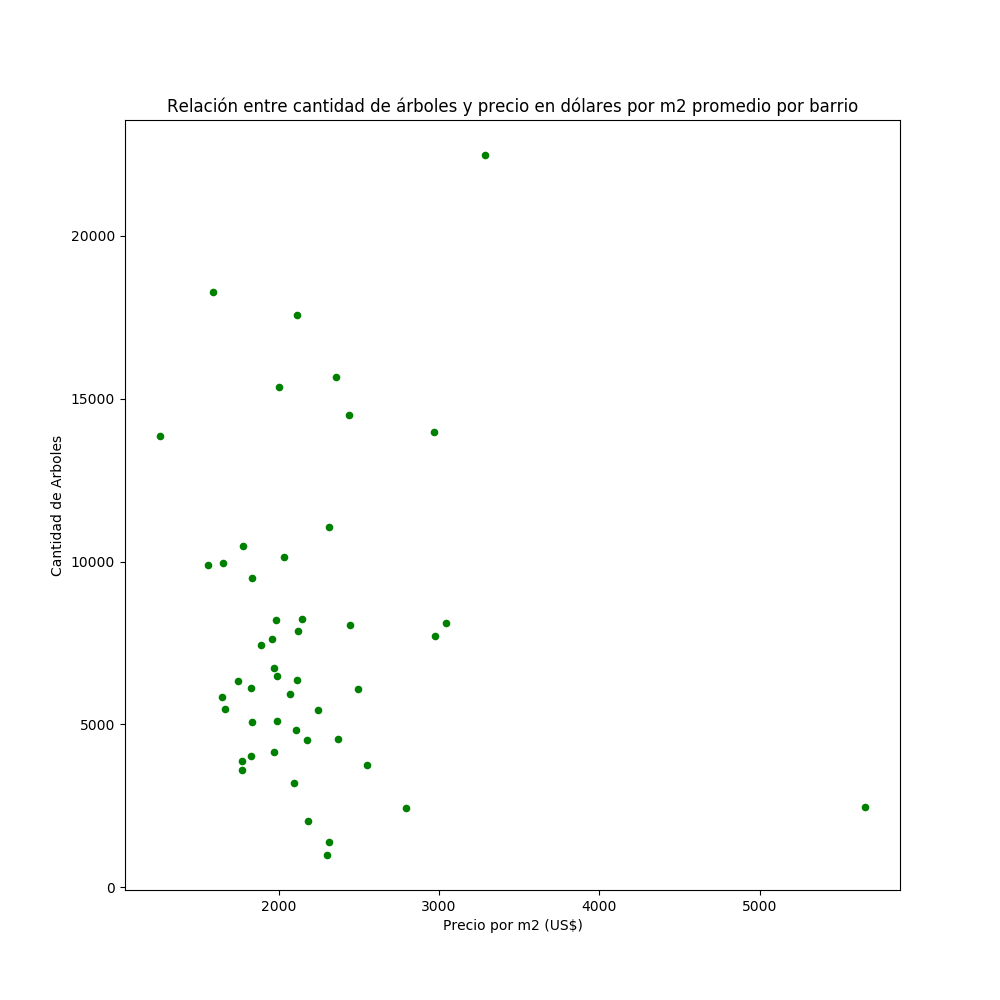

In [51]:
df_unificado = pd.merge(df_por_barrio, df_arboles, how='outer')
plot_arboles = df_unificado.plot.scatter('price_usd_per_m2', 'CANTIDAD', color = 'green', title = "Relación entre cantidad de árboles y precio en dólares por m2 promedio por barrio")
plot_arboles.set_xlabel("Precio por m2 (US$)")
plot_arboles.set_ylabel("Cantidad de Arboles")

No se puede ver una relación clara entre la cantidad de arboles por barrio y su precio promedio por m2. También es verdad que los barrios más grandes tienen una mayor superficie y por lo tanto es probable que tengan mas árboles. Sería una buena idea calcular el área que ocupa cada barrio, y dividir el número de árboles por esa cantidad, y armar un nuevo plot. 
Éste nuevo dato lo extraeremos de otro dataset provisto por el Gobierno de la Ciudad (https://data.buenosaires.gob.ar/dataset/barrios), que fue editado para poder ser leido con read_csv. En él encontramos el área de cada barrio.

In [52]:
df_area = pd.read_csv('barrios.csv', low_memory=False, delimiter=',')
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
BARRIO    48 non-null object
AREA      48 non-null float64
dtypes: float64(1), object(1)
memory usage: 848.0+ bytes


In [53]:
df_unificado = pd.merge(df_unificado, df_area, how='outer')
df_unificado['arboles_proporcional_al_area'] = df_unificado['CANTIDAD']/df_unificado['AREA']

<IPython.core.display.Javascript object>


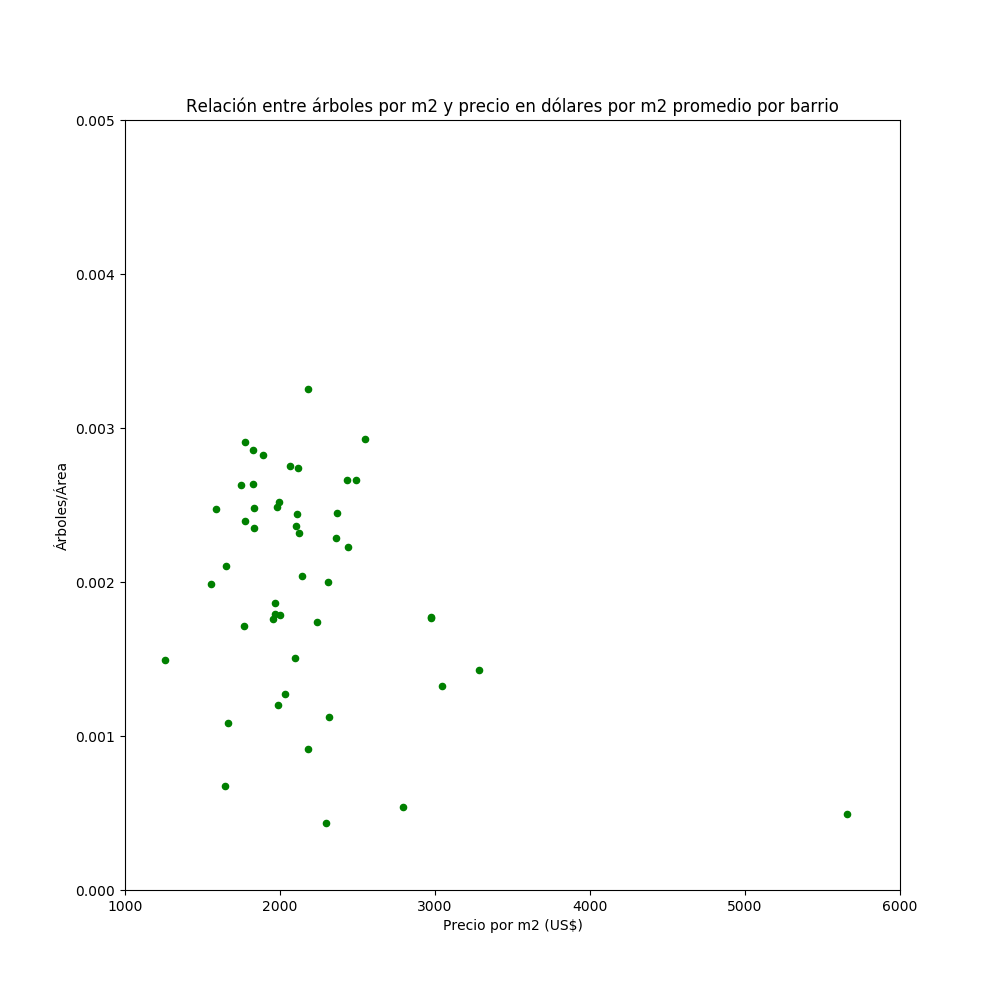

[1000, 6000, 0, 0.005]

In [54]:
plot_arboles = df_unificado.plot.scatter('price_usd_per_m2', 'arboles_proporcional_al_area', color = 'green', title = "Relación entre árboles por m2 y precio en dólares por m2 promedio por barrio")
plot_arboles.set_xlabel("Precio por m2 (US$)")
plot_arboles.set_ylabel("Árboles/Área")
plot_arboles.axis([1000, 6000,0,0.005])

Sigue sin verse una clara relación, pero ya que procesamos todos estos datos, mostremos los 10 barrios que mayor concentración de árboles tienen respecto a su área.

In [55]:
df_unificado.sort_values('arboles_proporcional_al_area', ascending = False)[['BARRIO']].head(10)

,BARRIO
23,PARQUE CHAS
9,COGHLAN
43,VILLA REAL
34,VERSALLES
17,MONTE CASTRO
45,VILLA SANTA RITA
37,VILLA DEVOTO
47,VILLA URQUIZA
10,COLEGIALES
13,FLORESTA


Y los 10 que menos proporción de árboles tienen.

In [56]:
df_unificado.sort_values('arboles_proporcional_al_area', ascending = True)[['BARRIO']].head(10)

,BARRIO
31,SAN NICOLAS
26,PUERTO MADERO
28,RETIRO
46,VILLA SOLDATI
16,MONSERRAT
5,BOCA
32,SAN TELMO
44,VILLA RIACHUELO
3,BARRACAS
27,RECOLETA
